<span style="color: blue;font-weight: bold; font-size: 40px;">PyCaret: ISBSG-SDV Data Analysis & Regression </span>


In [1]:
# <span style="color: blue;">ISBSG Data Analysis & Regression</span>


In [2]:
import sys

print(sys.executable)

C:\Users\jdche\.conda\envs\pycaret311\python.exe


In [3]:
# # ISBSG Data Analysis and Regression Modeling
# 
# This notebook performs data cleaning, preprocessing, and regression modeling on the ISBSG dataset.

# ## Setup and Environment Configuration

# Install required packages (uncomment if needed)
#!pip install -r "../requirements.txt" --only-binary=all

In [4]:
# Import basic libraries
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pycaret
from datetime import datetime
import re
import seaborn as sns
import sklearn
import shap

In [5]:
# Define the foler path
models_folder = '../models'
config_folder = '../config'
skeleton_models_folder = '../skeleton_models'
plots_folder = '../plots'
temp_folder = '../temp'
data_folder = '../data'
logs_folder = '../logs'
#sample_file = 'sample_clean_a_agile_only_cleaned_no_add.csv'
data_file = 'synthetic_financial.csv'

# Identify target column
TARGET_COL = 'project_prf_normalised_work_effort'
print(f"\nTarget variable: '{TARGET_COL}'")


Target variable: 'project_prf_normalised_work_effort'


<a id = 'Index:'></a>

# Table of Content

In this notebook you will apply xxxxxxx


- [Part 1](#part1)- Data Loading and Initial Exploration
- [Part 2](#part2)- Data Cleaning and Preprocessing
- [Part 3](#part3)- Data Profiling
- [Part 4](#part4)- Module Building with PyCaret
- [Part 5](#part5)- Model Preparation
- [Part 6](#part6)- Baseline Modeling and Evaluation
- [Part 7](#part7)- Advanced Modeling and Hyperparameter Tuning
- [Part 8](#part8)- Model Comparison and Selection
- [Part 9](#part9)- End


In [6]:
# Configure timestamp callback for Jupyter cells
from IPython import get_ipython

def setup_timestamp_callback():
    """Setup a timestamp callback for Jupyter cells without clearing existing callbacks."""
    ip = get_ipython()
    if ip is not None:
        # Define timestamp function
        def print_timestamp(*args, **kwargs):
            """Print timestamp after cell execution."""
            print(f"Cell executed at: {datetime.now()}")
        
        # Check if our callback is already registered
        callbacks = ip.events.callbacks.get('post_run_cell', [])
        for cb in callbacks:
            if hasattr(cb, '__name__') and cb.__name__ == 'print_timestamp':
                # Already registered
                return
                
        # Register new callback if not already present
        ip.events.register('post_run_cell', print_timestamp)
        print("Timestamp printing activated.")
    else:
        print("Not running in IPython/Jupyter environment.")

# Setup timestamp callback
setup_timestamp_callback()

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

Timestamp printing activated.
Cell executed at: 2025-07-08 10:38:47.759646


[Back to top](#Index:)

<a id='part1'></a>

# Part 1 -Data Loading and Initial Exploration

This section is dedicated to loading the dataset, performing initial data exploration such as viewing the first few rows, and summarizing the dataset's characteristics, including missing values and basic statistical measures.

In [7]:
# Load the data

from pathlib import Path

print("Loading data...")

file_path = f"{data_folder}/{data_file}"  #should use data_file
file_name_no_ext = Path(file_path).stem                
print(file_name_no_ext)


df = pd.read_csv(file_path)


Loading data...
synthetic_financial
Cell executed at: 2025-07-08 10:38:47.879050


# Exploratory Data Analysis

## Data Overview

Dataset shape: (10000, 91)
First 5 rows:


,isbsg_project_id,project_prf_year_of_project,project_prf_application_type,tech_tf_primary_programming_language,project_prf_functional_size,project_prf_normalised_work_effort_level_1,project_prf_normalised_work_effort,project_prf_normalised_level_1_pdr_ufp,project_prf_normalised_pdr_ufp,project_prf_speed_of_delivery,...,external_eef_data_quality_rating_B,external_eef_data_quality_rating_D,project_prf_case_tool_used_Missing,project_prf_case_tool_used_No,project_prf_case_tool_used_Yes,tech_tf_client_server_Don_t_Know,tech_tf_client_server_Missing,tech_tf_client_server_Yes,tech_tf_dbms_used_Missing,tech_tf_dbms_used_Yes
0,26764,2014,financial transaction process/accounting,Script Language,491.729160,6817.0140,6610.5425,21.899160,22.634920,63.034393,...,False,False,False,False,False,False,False,False,False,False
1,13626,2014,mobile application,COBOL,24.865726,1359.9563,1809.8417,21.974876,20.300020,0.488692,...,False,False,False,True,False,False,False,False,False,False
2,29945,2014,cards and payments,COBOL,483.400270,15691.2690,14546.4250,52.528492,54.071400,36.194458,...,True,False,False,False,False,False,False,False,False,False
3,16563,2014,financial transaction process/accounting,Missing,43.361336,6329.9873,5579.0977,105.465930,100.604935,4.814783,...,False,False,False,False,False,False,False,False,False,False
4,22302,2014,financial transaction process/accounting,AppBuilder,354.543760,10959.2690,10222.4000,31.986570,32.402622,15.004630,...,False,False,False,False,False,False,False,False,False,False


Last 5 rows:


,isbsg_project_id,project_prf_year_of_project,project_prf_application_type,tech_tf_primary_programming_language,project_prf_functional_size,project_prf_normalised_work_effort_level_1,project_prf_normalised_work_effort,project_prf_normalised_level_1_pdr_ufp,project_prf_normalised_pdr_ufp,project_prf_speed_of_delivery,...,external_eef_data_quality_rating_B,external_eef_data_quality_rating_D,project_prf_case_tool_used_Missing,project_prf_case_tool_used_No,project_prf_case_tool_used_Yes,tech_tf_client_server_Don_t_Know,tech_tf_client_server_Missing,tech_tf_client_server_Yes,tech_tf_dbms_used_Missing,tech_tf_dbms_used_Yes
9995,18391,2014,financial transaction process/accounting,COBOL,86.68495,2763.0127,2741.7131,46.239670,46.121700,11.028970,...,False,False,False,False,False,False,False,False,False,False
9996,30636,2014,management or performance reporting,COBOL,133.58577,721.2537,765.1985,8.166291,11.244544,31.652506,...,False,False,False,False,False,False,False,False,False,True
9997,28650,2014,financial transaction process/accounting,C#,163.65274,4539.2827,5195.4370,11.903159,16.204000,16.098333,...,False,False,False,False,False,False,False,True,False,False
9998,27063,2014,financial transaction process/accounting; work...,COBOL,1993.53690,5384.4053,4865.1562,1.400213,1.400217,130.468320,...,False,False,True,False,False,False,False,False,False,False
9999,15090,2014,financial transaction process/accounting,C#,784.58466,1452.9502,1513.3228,1.553944,1.546822,46.090706,...,False,False,False,False,False,False,False,False,False,False


## Duplicate Rows

Number of duplicate rows: 0


## Data Types and Memory Usage

,Data Type,Memory Usage (MB)
Index,NaN,0.000126
external_eef_data_quality_rating_A,bool,0.009537
external_eef_data_quality_rating_B,bool,0.009537
external_eef_data_quality_rating_D,bool,0.009537
external_eef_industry_sector_Banking,bool,0.009537
...,...,...
tech_tf_language_type_4GL,bool,0.009537
tech_tf_language_type_5GL,bool,0.009537
tech_tf_language_type_Missing,bool,0.009537
tech_tf_primary_programming_language,object,0.589862


## Unique Values Per Column

isbsg_project_id: 185 unique values
project_prf_year_of_project: 1 unique values
project_prf_application_type: 15 unique values
tech_tf_primary_programming_language: 29 unique values
project_prf_functional_size: 10000 unique values
project_prf_normalised_work_effort_level_1: 10000 unique values
project_prf_normalised_work_effort: 10000 unique values
project_prf_normalised_level_1_pdr_ufp: 9999 unique values
project_prf_normalised_pdr_ufp: 9998 unique values
project_prf_speed_of_delivery: 10000 unique values
project_prf_manpower_delivery_rate: 8660 unique values
project_prf_project_elapsed_time: 9998 unique values
project_prf_max_team_size: 9999 unique values
process_pmf_docs: 15 unique values
tech_tf_tools_used: 6 unique values
external_eef_organisation_type_banking_insurance_stock: 2 unique values
external_eef_organisation_type_banking: 2 unique values
external_eef_organisation_type_communications: 2 unique values
external_eef_organisation_type_education_institution: 2 unique values
e

## Type Conversion Suggestions

Consider converting to 'category' dtype for memory/performance:
['project_prf_application_type', 'tech_tf_primary_programming_language']


## Summary Statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
isbsg_project_id,10000.000000,nan,nan,nan,21871.103100,6621.834836,10066.000000,16089.000000,22262.000000,27547.000000,32725.000000
project_prf_year_of_project,10000.000000,nan,nan,nan,2014.000000,0.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
project_prf_application_type,10000,15,financial transaction process/accounting,5788,nan,nan,nan,nan,nan,nan,nan
tech_tf_primary_programming_language,10000,29,COBOL,2589,nan,nan,nan,nan,nan,nan,nan
project_prf_functional_size,10000.000000,nan,nan,nan,354.184826,464.047436,3.000051,48.365335,176.198395,480.674977,4744.056000
project_prf_normalised_work_effort_level_1,10000.000000,nan,nan,nan,5095.756345,6312.013060,9.002660,782.088903,2749.397450,7095.878350,50457.000000
project_prf_normalised_work_effort,10000.000000,nan,nan,nan,4775.894404,5655.008489,9.005470,799.072940,2702.938700,6731.053525,47176.293000
project_prf_normalised_level_1_pdr_ufp,10000.000000,nan,nan,nan,26.083870,29.052841,1.400027,5.646470,15.722101,36.190768,237.288500
project_prf_normalised_pdr_ufp,10000.000000,nan,nan,nan,27.987860,30.250194,1.400121,6.408696,17.540048,38.905621,247.538070
project_prf_speed_of_delivery,10000.000000,nan,nan,nan,38.959285,50.132152,0.300000,5.461499,19.954251,52.651438,467.852450


## Missing Values

,Missing Values,Percentage (%)
project_prf_manpower_delivery_rate,1339,13.390000


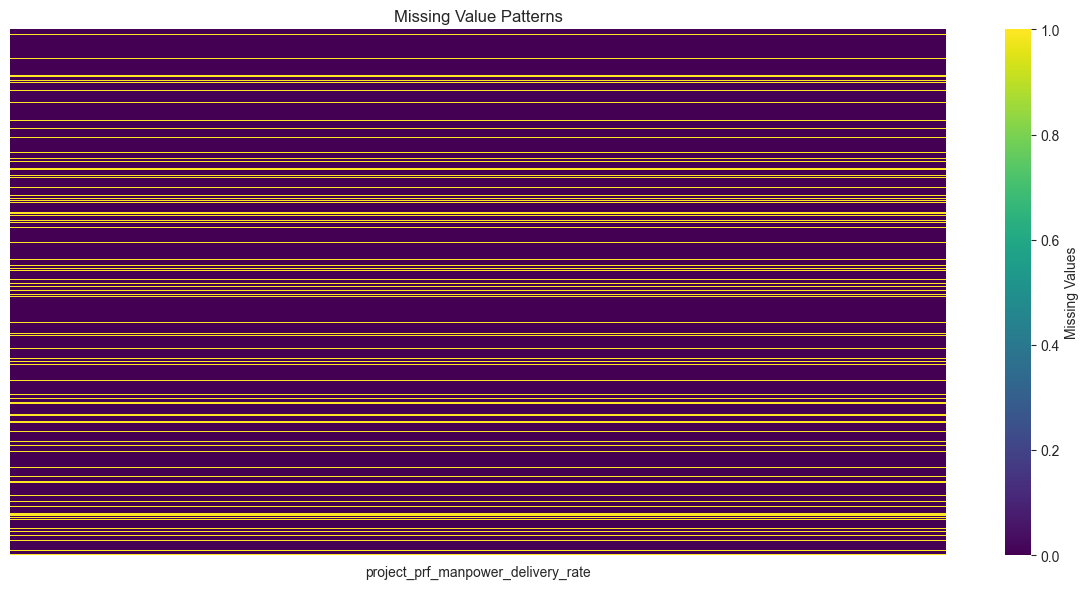

## Distribution of Numerical Features

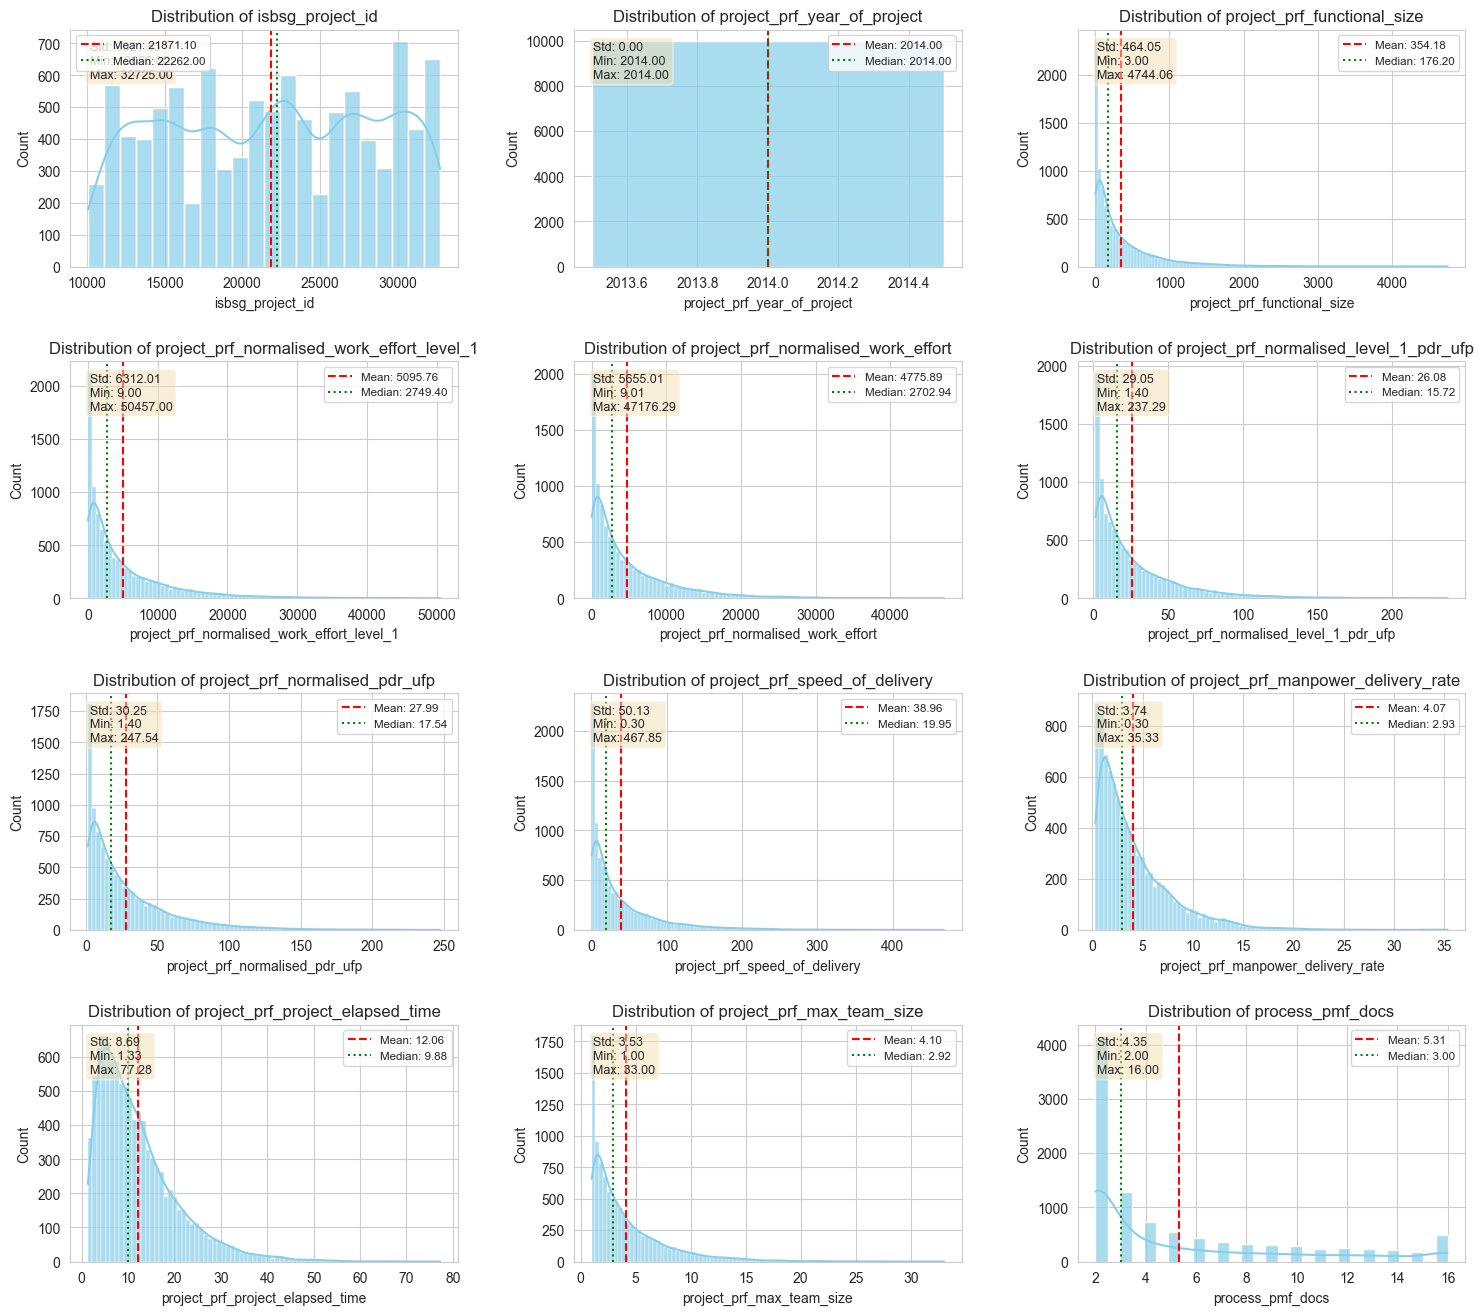

## Correlation Matrix

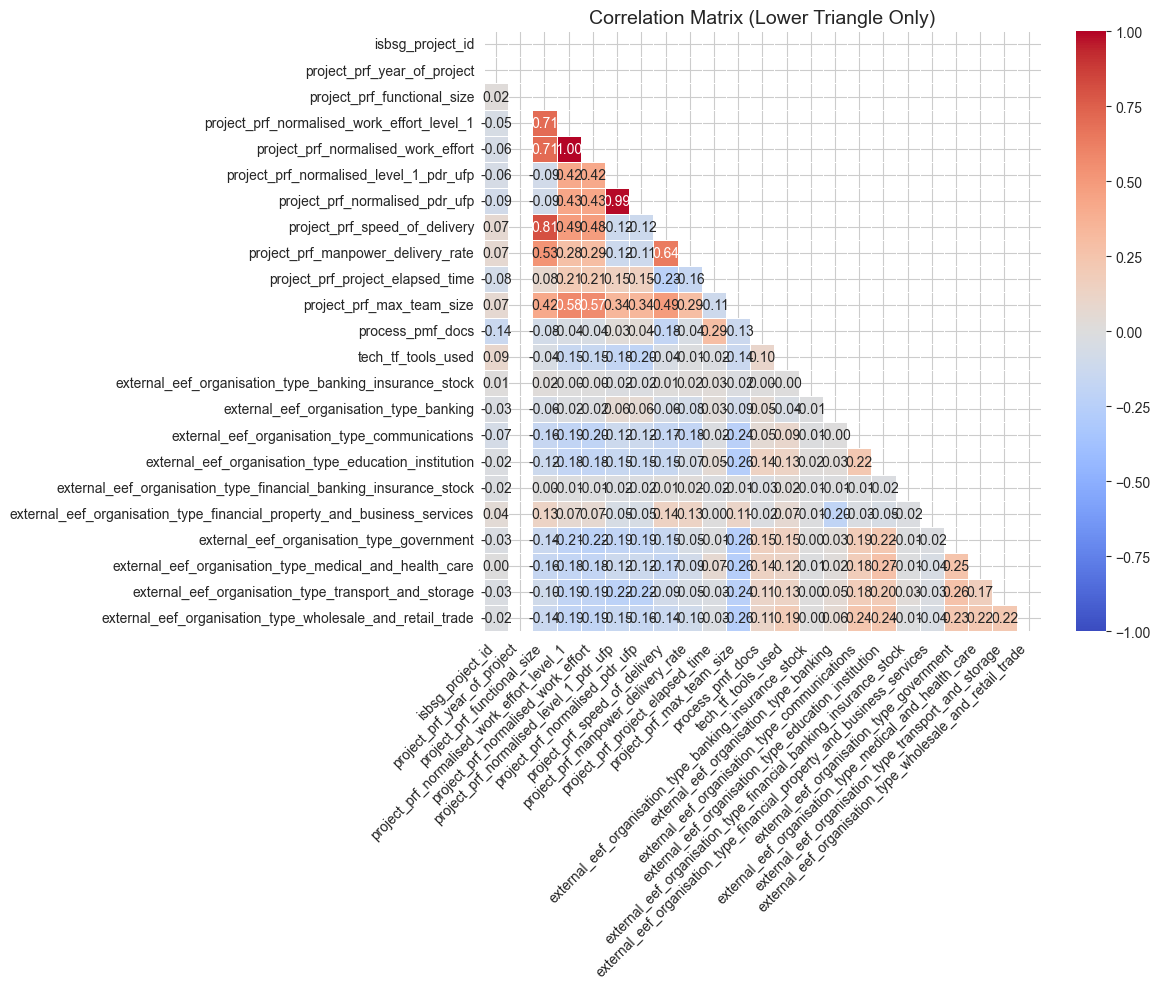

## Top Correlations

project_prf_normalised_pdr_ufp — project_prf_normalised_level_1_pdr_ufp: 0.99
project_prf_normalised_level_1_pdr_ufp — project_prf_normalised_pdr_ufp: 0.99
project_prf_speed_of_delivery — project_prf_functional_size: 0.81
project_prf_functional_size — project_prf_speed_of_delivery: 0.81
project_prf_normalised_work_effort — project_prf_functional_size: 0.71
project_prf_normalised_work_effort_level_1 — project_prf_functional_size: 0.71
project_prf_functional_size — project_prf_normalised_work_effort_level_1: 0.71
project_prf_functional_size — project_prf_normalised_work_effort: 0.71
project_prf_manpower_delivery_rate — project_prf_speed_of_delivery: 0.64
project_prf_speed_of_delivery — project_prf_manpower_delivery_rate: 0.64
project_prf_max_team_size — project_prf_normalised_work_effort_level_1: 0.58
project_prf_normalised_work_effort_level_1 — project_prf_max_team_size: 0.58
project_prf_normalised_work_effort — project_prf_max_team_size: 0.57
project_prf_max_team_size — project_prf_nor

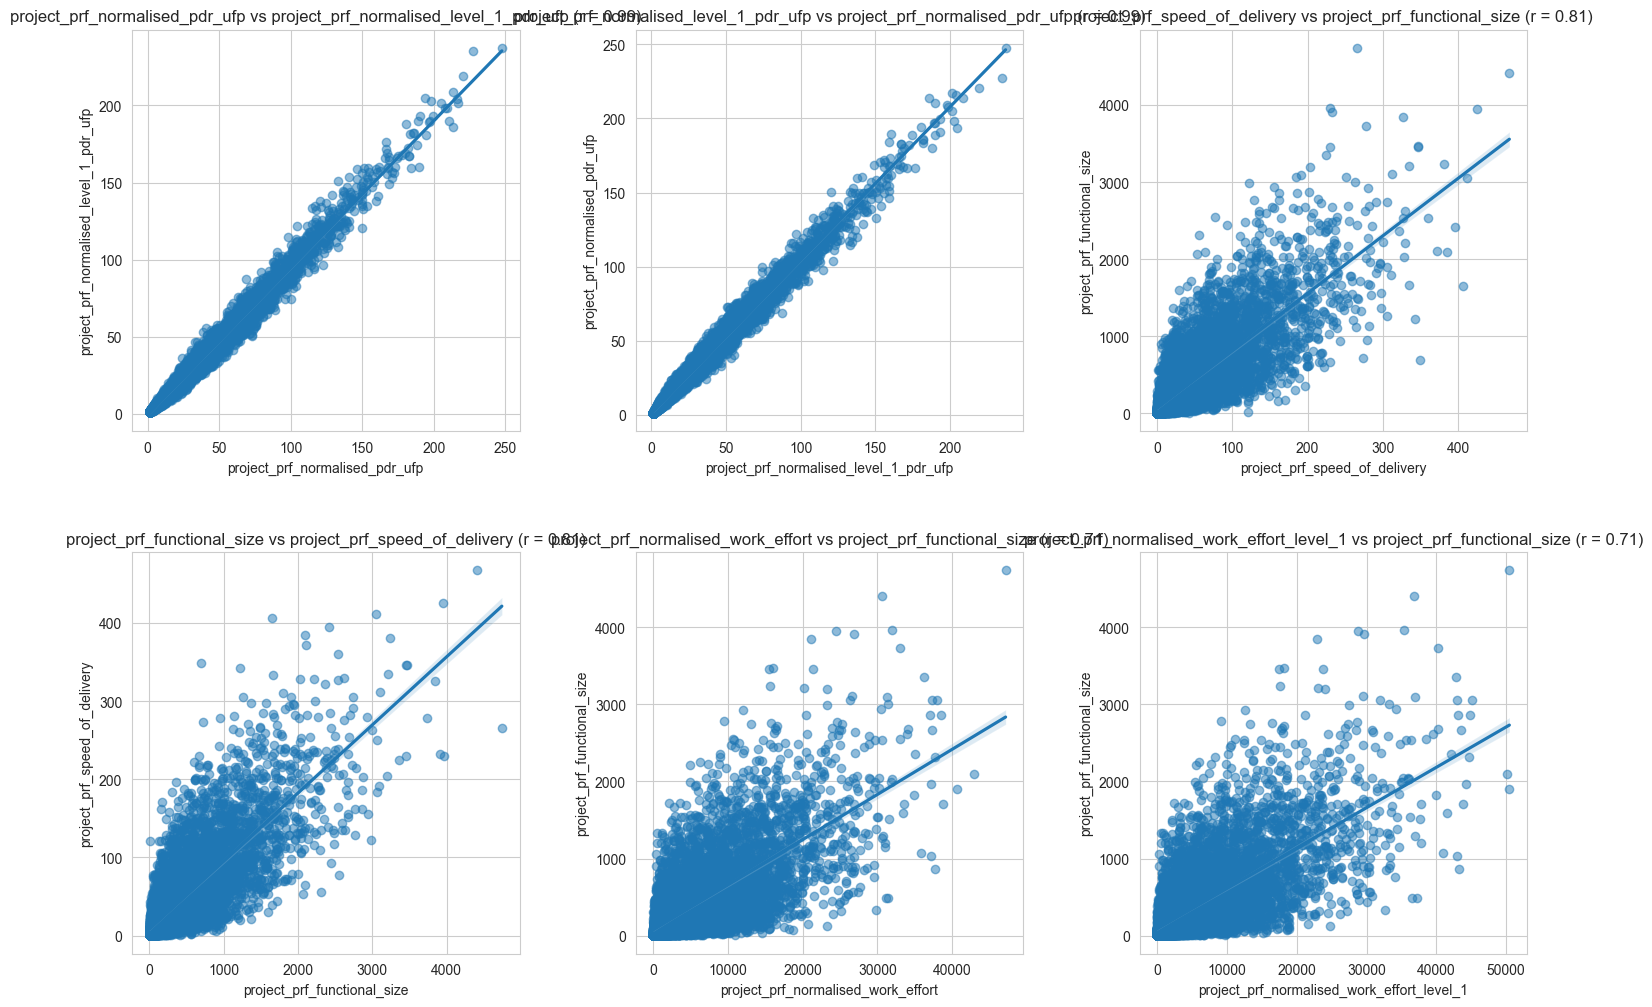

## Categorical Features

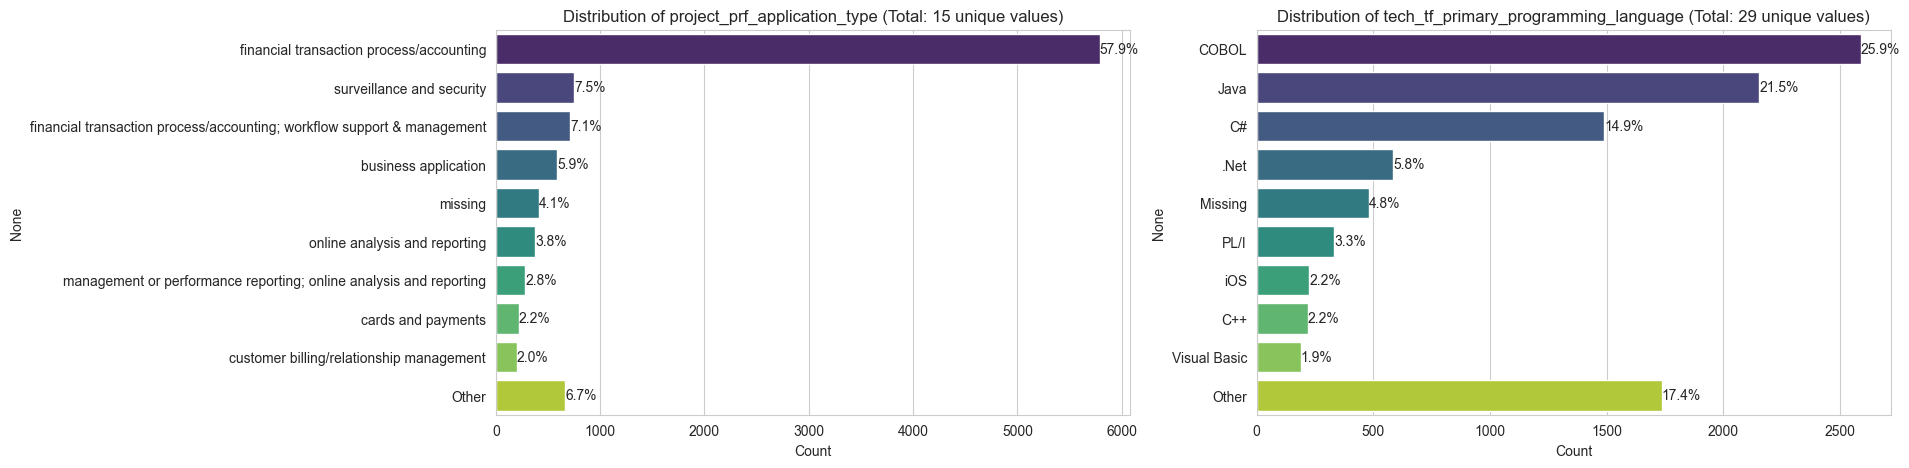

## Categorical-Numerical Relationships

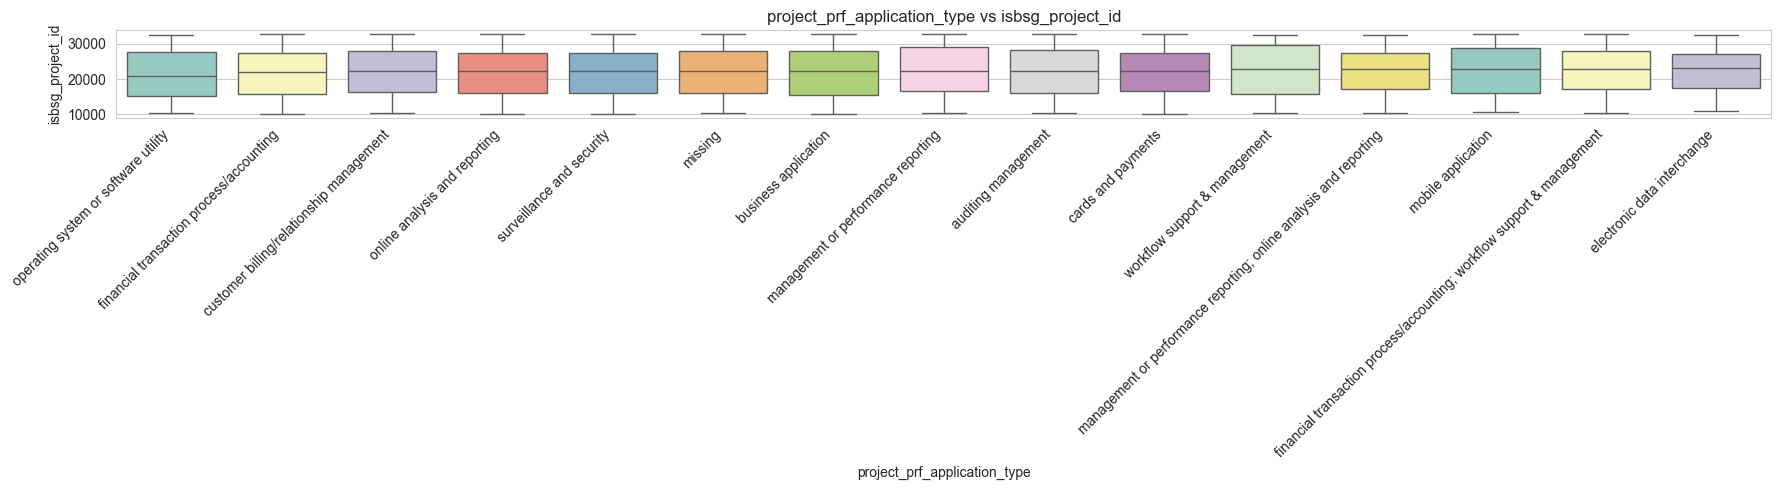

Cell executed at: 2025-07-08 10:39:00.039127


In [8]:
def display_header(text):
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"# {text}"))
    except ImportError:
        print(f"\n=== {text} ===\n")

def display_subheader(text):
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"## {text}"))
    except ImportError:
        print(f"\n-- {text} --\n")

def explore_data(df: pd.DataFrame) -> None:
    """
    Perform exploratory data analysis on the input DataFrame with nicely aligned plots.
    Args:
        df: Input DataFrame
    """
    from IPython.display import display

    display_header("Exploratory Data Analysis")
    
    # Data Overview
    display_subheader("Data Overview")
    print(f"Dataset shape: {df.shape}")
    if df.shape[0] > 20:
        print("First 5 rows:")
        display(df.head())
        print("Last 5 rows:")
        display(df.tail())
    else:
        display(df)
    
    # Duplicate Row Checking
    display_subheader("Duplicate Rows")
    num_duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {num_duplicates}")

    # Data Types and Memory Usage
    display_subheader("Data Types and Memory Usage")
    dtype_info = pd.DataFrame({
        'Data Type': df.dtypes,
        'Memory Usage (MB)': df.memory_usage(deep=True) / 1024 / 1024
    })
    display(dtype_info)
    
    # Unique Values Per Column
    display_subheader("Unique Values Per Column")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
    
    # Type Conversion Suggestions
    display_subheader("Type Conversion Suggestions")
    potential_cat = [
        col for col in df.select_dtypes(include=['object']).columns
        if df[col].nunique() < max(30, 0.05*df.shape[0])
    ]
    if potential_cat:
        print("Consider converting to 'category' dtype for memory/performance:")
        print(potential_cat)
    else:
        print("No obvious candidates for 'category' dtype conversion.")
    
    # Summary Statistics
    display_subheader("Summary Statistics")
    try:
        display(df.describe(include='all').T.style.background_gradient(cmap='Blues', axis=1))
    except Exception:
        display(df.describe(include='all').T)
    
    # Missing Values
    display_subheader("Missing Values")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Values': missing,
        'Percentage (%)': missing_percent.round(2)
    })
    if missing.sum() > 0:
        display(missing_info[missing_info['Missing Values'] > 0]
                .sort_values('Missing Values', ascending=False)
                .style.background_gradient(cmap='Reds'))
        # Visualize missing values
        plt.figure(figsize=(12, 6))
        cols_with_missing = missing_info[missing_info['Missing Values'] > 0].index
        if len(cols_with_missing) > 0:
            sns.heatmap(df[cols_with_missing].isnull(), 
                        cmap='viridis', 
                        yticklabels=False, 
                        cbar_kws={'label': 'Missing Values'})
            plt.title('Missing Value Patterns')
            plt.tight_layout()
            plt.show()
    else:
        print("No missing values in the dataset.")
    
    # Numerical Distributions
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if len(numerical_cols) > 0:
        display_subheader("Distribution of Numerical Features")
        sample_cols = numerical_cols[:min(12, len(numerical_cols))]
        num_cols = len(sample_cols)
        num_rows = (num_cols + 2) // 3  # 3 plots per row, rounded up
        fig = plt.figure(figsize=(18, num_rows * 4))
        grid = plt.GridSpec(num_rows, 3, figure=fig, hspace=0.4, wspace=0.3)
        for i, col in enumerate(sample_cols):
            row, col_pos = divmod(i, 3)
            ax = fig.add_subplot(grid[row, col_pos])
            sns.histplot(df[col].dropna(), kde=True, ax=ax, color='skyblue', alpha=0.7)
            mean_val = df[col].mean()
            median_val = df[col].median()
            ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
            ax.axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
            stats_text = (f"Std: {df[col].std():.2f}\n"
                          f"Min: {df[col].min():.2f}\n"
                          f"Max: {df[col].max():.2f}")
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=9,
                    verticalalignment='top', bbox=props)
            ax.set_title(f'Distribution of {col}')
            ax.legend(fontsize='small')
        plt.tight_layout()
        plt.show()
        # Correlation matrix and top correlations
        if len(numerical_cols) > 1:
            display_subheader("Correlation Matrix")
            corr = df[numerical_cols].corr().round(2)
            mask = np.triu(np.ones_like(corr, dtype=bool))
            plt.figure(figsize=(12, 10))
            sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', 
                        fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, 
                        annot_kws={"size": 10})
            plt.title('Correlation Matrix (Lower Triangle Only)', fontsize=14)
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.yticks(fontsize=10)
            plt.tight_layout()
            plt.show()
            # Top correlations
            if len(numerical_cols) > 5:
                corr_unstack = corr.unstack()
                corr_abs = corr_unstack.apply(abs)
                corr_abs = corr_abs[corr_abs < 1.0]
                highest_corrs = corr_abs.sort_values(ascending=False).head(15)
                display_subheader("Top Correlations")
                for (col1, col2), corr_val in highest_corrs.items():
                    actual_val = corr.loc[col1, col2]
                    print(f"{col1} — {col2}: {actual_val:.2f}")
                pairs_to_plot = [(idx[0], idx[1]) for idx in highest_corrs.index][:6]
                if pairs_to_plot:
                    fig = plt.figure(figsize=(18, 12))
                    grid = plt.GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)
                    for i, (col1, col2) in enumerate(pairs_to_plot):
                        row, col_pos = divmod(i, 3)
                        ax = fig.add_subplot(grid[row, col_pos])
                        sns.regplot(x=df[col1], y=df[col2], ax=ax, scatter_kws={'alpha':0.5})
                        r_value = df[col1].corr(df[col2])
                        ax.set_title(f'{col1} vs {col2} (r = {r_value:.2f})')
                    plt.tight_layout()
                    plt.show()
    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if len(categorical_cols) > 0:
        display_subheader("Categorical Features")
        sample_cat_cols = categorical_cols[:min(6, len(categorical_cols))]
        num_cat_cols = len(sample_cat_cols)
        num_cat_rows = (num_cat_cols + 1) // 2
        fig = plt.figure(figsize=(18, num_cat_rows * 5))
        grid = plt.GridSpec(num_cat_rows, 2, figure=fig, hspace=0.4, wspace=0.2)
        for i, col in enumerate(sample_cat_cols):
            row, col_pos = divmod(i, 2)
            ax = fig.add_subplot(grid[row, col_pos])
            value_counts = df[col].value_counts().sort_values(ascending=False)
            top_n = min(10, len(value_counts))
            if len(value_counts) > top_n:
                top_values = value_counts.head(top_n-1)
                other_count = value_counts.iloc[top_n-1:].sum()
                plot_data = pd.concat([top_values, pd.Series({'Other': other_count})])
            else:
                plot_data = value_counts
            sns.barplot(x=plot_data.values, y=plot_data.index, ax=ax, palette='viridis')
            ax.set_title(f'Distribution of {col} (Total: {len(value_counts)} unique values)')
            ax.set_xlabel('Count')
            total = plot_data.sum()
            for j, v in enumerate(plot_data.values):
                percentage = v / total * 100
                ax.text(v + 0.1, j, f'{percentage:.1f}%', va='center')
        plt.tight_layout()
        plt.show()
        # Categorical-numerical boxplots
        if numerical_cols and len(categorical_cols) > 0:
            display_subheader("Categorical-Numerical Relationships")
            numerical_variances = df[numerical_cols].var()
            target_numerical = numerical_variances.idxmax()
            sample_cat_for_box = [col for col in categorical_cols 
                                  if df[col].nunique() <= 15][:4]
            if sample_cat_for_box:
                fig = plt.figure(figsize=(18, 5 * len(sample_cat_for_box)))
                for i, cat_col in enumerate(sample_cat_for_box):
                    ax = fig.add_subplot(len(sample_cat_for_box), 1, i+1)
                    order = df.groupby(cat_col)[target_numerical].median().sort_values().index
                    sns.boxplot(x=cat_col, y=target_numerical, data=df, ax=ax, 
                                order=order, palette='Set3')
                    ax.set_title(f'{cat_col} vs {target_numerical}')
                    ax.set_xlabel(cat_col)
                    ax.set_ylabel(target_numerical)
                    plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()

# Exploratory Data Analysis
explore_data(df)


In [9]:
df_func_relative_size_midpoints = pd.DataFrame([
    {"code": "XXS",  "name": "Extra-extra-small",        "midpoint": 5},
    {"code": "XS",   "name": "Extra-small",              "midpoint": 20},
    {"code": "S",    "name": "Small",                    "midpoint": 65},
    {"code": "M1",   "name": "Medium1",                  "midpoint": 200},
    {"code": "M2",   "name": "Medium2",                  "midpoint": 650},
    {"code": "L",    "name": "Large",                    "midpoint": 2000},
    {"code": "XL",   "name": "Extra-large",              "midpoint": 6000},
    {"code": "XXL",  "name": "Extra-extra-large",        "midpoint": 13500},
    {"code": "XXXL", "name": "Extra-extra-extra-large",  "midpoint": 18000} # or None
])


Cell executed at: 2025-07-08 10:39:00.058915


[Back to top](#Index:)

<a id='#part2'></a>

# Part 2 - Data Cleaning and Preprocessing

Here, data cleaning tasks like handling missing values and providing a detailed summary of each feature, including its type, number of unique values, and a preview of unique values, are performed.

In [10]:
# Analyse missing values
print("\nAnalysing missing values...")
missing_pct = df.isnull().mean() * 100
missing_sorted = missing_pct.sort_values(ascending=False)
print("Top 10 columns with highest missing percentages:")
print(missing_sorted)


Analysing missing values...
Top 10 columns with highest missing percentages:
project_prf_manpower_delivery_rate                       13.39
isbsg_project_id                                          0.00
project_prf_relative_size_XS                              0.00
project_prf_team_size_group_5_8                           0.00
project_prf_team_size_group_31_40                         0.00
                                                         ...  
project_prf_application_group_Missing                     0.00
project_prf_application_group_Infrastructure_Software     0.00
project_prf_application_group_Business_Application        0.00
external_eef_industry_sector_Financial                    0.00
tech_tf_dbms_used_Yes                                     0.00
Length: 91, dtype: float64
Cell executed at: 2025-07-08 10:39:00.076407


In [11]:
# Identify columns with high missing values (>70%)
high_missing_cols = missing_pct[missing_pct > 70].index.tolist()
print(f"\nColumns with >70% missing values ({len(high_missing_cols)} columns):")
for col in high_missing_cols[:]:  # Show first 5
    print(f"  - {col}: {missing_pct[col]:.2f}% missing")
if len(high_missing_cols) > 5:
    print(f"  - ... and {len(high_missing_cols) - 5} more columns")

print(f"Columns are: {list(df.columns)}")


Columns with >70% missing values (0 columns):
Columns are: ['isbsg_project_id', 'project_prf_year_of_project', 'project_prf_application_type', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_speed_of_delivery', 'project_prf_manpower_delivery_rate', 'project_prf_project_elapsed_time', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_tools_used', 'external_eef_organisation_type_banking_insurance_stock', 'external_eef_organisation_type_banking', 'external_eef_organisation_type_communications', 'external_eef_organisation_type_education_institution', 'external_eef_organisation_type_financial_banking_insurance_stock', 'external_eef_organisation_type_financial_property_and_business_services', 'external_eef_organisation_type_government', 'external_eef_organisation_type_medical_and_health_car

In [12]:
# Create a clean dataframe by dropping high-missing columns

cols_to_keep = ['project_prf_year_of_project', 'external_eef_industry_sector', 'tech_tf_primary_programming_language', 
                'project_prf_functional_size', 'project_prf_normalised_work_effort', 'project_prf_team_size_group', 
                'project_prf_max_team_size', 'process_pmf_development_methodologies', 'process_pmf_docs', 'tech_tf_client_roles', 
                'tech_tf_server_roles', 'tech_tf_tools_used', 'project_prf_application_group_business_application', 
                'project_prf_application_group_infrastructure_software', 'project_prf_application_group_mathematically_intensive_application', 
                'project_prf_application_group_nan', 'project_prf_application_group_real_time_application', 
                'tech_tf_clientserver_description_browser_server_architecture', 'tech_tf_clientserver_description_client_server', 
                'tech_tf_clientserver_description_client_presentation', 'tech_tf_clientserver_description_client_presentation_processing', 
                'tech_tf_clientserver_description_client_server_architecture', 'tech_tf_clientserver_description_client_server_architecture_p2p', 
                'tech_tf_clientserver_description_nan', 'tech_tf_clientserver_description_server_processing', 
                'tech_tf_clientserver_description_stand_alone', 'tech_tf_clientserver_description_web', 'project_prf_development_type_enhancement', 
                'project_prf_development_type_new_development', 'project_prf_development_type_other', 'project_prf_development_type_poc', 
                'project_prf_development_type_porting', 'project_prf_development_type_re_development', 'tech_tf_development_platform_mf', 
                'tech_tf_development_platform_mr', 'tech_tf_development_platform_multi', 'tech_tf_development_platform_nan', 
                'tech_tf_development_platform_pc', 'tech_tf_development_platform_proprietary', 'tech_tf_language_type_2gl', 
                'tech_tf_language_type_3gl', 'tech_tf_language_type_4gl', 'tech_tf_language_type_5gl', 'tech_tf_language_type_apg', 
                'tech_tf_language_type_nan', 'project_prf_relative_size_l', 'project_prf_relative_size_m1', 'project_prf_relative_size_m2', 
                'project_prf_relative_size_nan', 'project_prf_relative_size_s', 'project_prf_relative_size_xl', 'project_prf_relative_size_xs', 
                'project_prf_relative_size_xxl', 'project_prf_relative_size_xxs', 'project_prf_case_tool_used_don_t_know', 
                'project_prf_case_tool_used_nan', 'project_prf_case_tool_used_no', 'project_prf_case_tool_used_yes', 
                'process_pmf_prototyping_used_nan', 'process_pmf_prototyping_used_yes', 'tech_tf_architecture_client_server', 
                'tech_tf_architecture_multi_tier', 'tech_tf_architecture_multi_tier_with_web_interface', 
                'tech_tf_architecture_multi_tier_with_web_public_interface', 'tech_tf_architecture_nan', 'tech_tf_architecture_stand_alone', 
                'tech_tf_architecture_standalone', 'tech_tf_client_server_don_t_know', 'tech_tf_client_server_nan', 'tech_tf_client_server_no', 
                'tech_tf_client_server_yes', 'tech_tf_type_of_server_back_end', 'tech_tf_type_of_server_client_server', 
                'tech_tf_type_of_server_lan_based', 'tech_tf_type_of_server_mainframe', 
                'tech_tf_type_of_server_multi_tier_with_web_public_interface', 'tech_tf_type_of_server_nan', 'tech_tf_type_of_server_standalone', 
                'tech_tf_type_of_server_unix', 'tech_tf_type_of_server_webserver', 'tech_tf_web_development_nan', 'tech_tf_web_development_web', 
                'tech_tf_dbms_used_nan', 'tech_tf_dbms_used_no', 'tech_tf_dbms_used_yes', 'people_prf_project_user_involvement_best', 
                'people_prf_project_user_involvement_don_t_know', 'people_prf_project_user_involvement_low', 
                'people_prf_project_user_involvement_nan', 'people_prf_project_user_involvement_no', 'people_prf_project_user_involvement_yes', 
                'external_eef_organisation_type_top_insurance', 'external_eef_organisation_type_top_medical and health care', 
                'external_eef_organisation_type_top_manufacturing', 'external_eef_organisation_type_top_telecommunications', 
                'external_eef_organisation_type_top_government', 'external_eef_organisation_type_top_nan', 
                'external_eef_organisation_type_top_communications', 'external_eef_organisation_type_top_banking', 
                'external_eef_organisation_type_top_computers & software', 'external_eef_organisation_type_top_defence', 
                'external_eef_organisation_type_top_public administration', 'external_eef_organisation_type_top_aerospace / automotive', 
                'external_eef_organisation_type_top_transport & storage', 
                'external_eef_organisation_type_top_financial, property & business services', 
                'external_eef_organisation_type_top_education institution', 'external_eef_organisation_type_top_community services', 
                'external_eef_organisation_type_top_electricity, gas, water', 'external_eef_organisation_type_top_logistics', 
                'external_eef_organisation_type_top_wholesale & retail trade', 'external_eef_organisation_type_top_telecommunication', 
                'external_eef_organisation_type_other', 'project_prf_application_type_top_financial transaction process/accounting', 
                'project_prf_application_type_top_not recorded', 'project_prf_application_type_top_nan', 'project_prf_application_type_top_unknown', 
                'project_prf_application_type_top_customer relationship management', 'project_prf_application_type_top_relatively complex application',
                'project_prf_application_type_top_workflow support & management', 'project_prf_application_type_top_business application', 
                'project_prf_application_type_top_embedded system/real_time application', 'project_prf_application_type_top_online. esales', 
                'project_prf_application_type_top_management of licences and permits', 
                'project_prf_application_type_top_online analysis and reporting', 
                'project_prf_application_type_top_catalogue/register of things or events', 
                'project_prf_application_type_top_software for machine control', 'project_prf_application_type_top_document management', 
                'project_prf_application_type_top_electronic data interchange', 'project_prf_application_type_top_management information system', 
                'project_prf_application_type_top_data warehouse system', 'project_prf_application_type_top_stock control & order processing', 
                'project_prf_application_type_top_management or performance reporting', 'project_prf_application_type_other', 
                'tech_tf_clientserver_description', 'project_prf_development_type_not_defined', 'tech_tf_development_platform_hand_held', 
                'project_prf_relative_size_xxxl', 'tech_tf_architecture_multi_tier_client_server', 'tech_tf_client_server_not_applicable', 
                'tech_tf_type_of_server_proprietary_midrange', 'project_prf_application_type_top_transaction/production system', 
                'project_prf_application_type_top_financial application area', 'project_prf_application_type_top_client-server', 
                'project_prf_application_type_top_customer billing/relationship management', 'people_prf_personnel_changes']

# Filter high_missing_cols to remove any you want to keep
final_high_missing_cols = [col for col in high_missing_cols if col not in cols_to_keep]


df_clean = df.drop(columns=final_high_missing_cols)
print(f"\nData shape after dropping high-missing columns: {df_clean.shape}")
print(f"\nHigh missing columns got dropped are: {final_high_missing_cols}")

# Numerical columns
num_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
print("\nNumerical columns:")
print(num_cols)

# Categorical columns (object or category dtype)
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical columns:")
print(cat_cols)




Data shape after dropping high-missing columns: (10000, 91)

High missing columns got dropped are: []

Numerical columns:
['isbsg_project_id', 'project_prf_year_of_project', 'project_prf_functional_size', 'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_speed_of_delivery', 'project_prf_manpower_delivery_rate', 'project_prf_project_elapsed_time', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_tools_used', 'external_eef_organisation_type_banking_insurance_stock', 'external_eef_organisation_type_banking', 'external_eef_organisation_type_communications', 'external_eef_organisation_type_education_institution', 'external_eef_organisation_type_financial_banking_insurance_stock', 'external_eef_organisation_type_financial_property_and_business_services', 'external_eef_organisation_type_government', 'external_eef_organisation_type_medical_and_health_care', 'exte

In [13]:
# Convert the column to numeric (invalid values become NaN)
#df_clean['tech_tf_development_platform_hand_held'] = pd.to_numeric(
#    df_clean['tech_tf_development_platform_hand_held'],
#    errors='coerce'  # This replaces invalid parsing with NaN
#)

Cell executed at: 2025-07-08 10:39:00.119757


In [14]:
# Handle remaining missing values
print("\nHandling remaining missing values...")


Handling remaining missing values...
Cell executed at: 2025-07-08 10:39:00.131686


In [15]:
# Fill missing values in categorical columns with "Missing"
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df_clean[col].fillna('Missing', inplace=True)

print(cat_cols)

Index(['project_prf_application_type', 'tech_tf_primary_programming_language'], dtype='object')
Cell executed at: 2025-07-08 10:39:00.135888


In [16]:
# Check remaining missing values
remaining_missing = df_clean.isnull().sum()
remaining_missing_count = sum(remaining_missing > 0)
print(f"\nColumns with remaining missing values: {remaining_missing_count}")
if remaining_missing_count > 0:
    print("Top columns with missing values:")
    print(remaining_missing[remaining_missing > 0].sort_values(ascending=False))


Columns with remaining missing values: 1
Top columns with missing values:
project_prf_manpower_delivery_rate    1339
dtype: int64
Cell executed at: 2025-07-08 10:39:00.147249


In [17]:
print(df_clean.columns.tolist())


['isbsg_project_id', 'project_prf_year_of_project', 'project_prf_application_type', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_speed_of_delivery', 'project_prf_manpower_delivery_rate', 'project_prf_project_elapsed_time', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_tools_used', 'external_eef_organisation_type_banking_insurance_stock', 'external_eef_organisation_type_banking', 'external_eef_organisation_type_communications', 'external_eef_organisation_type_education_institution', 'external_eef_organisation_type_financial_banking_insurance_stock', 'external_eef_organisation_type_financial_property_and_business_services', 'external_eef_organisation_type_government', 'external_eef_organisation_type_medical_and_health_care', 'external_eef_organisation_type_transport_and_storage', 

In [18]:
# Verify target variable
print(f"\nTarget variable '{TARGET_COL}' summary:")
print(f"Unique values: {df_clean[TARGET_COL].nunique()}")
print(f"Missing values: {df_clean[TARGET_COL].isnull().sum()}")
print(f"Top value counts:")
print(df_clean[TARGET_COL].value_counts().head())



Target variable 'project_prf_normalised_work_effort' summary:
Unique values: 10000
Missing values: 0
Top value counts:
project_prf_normalised_work_effort
6610.542500     1
10818.735000    1
15330.175000    1
3270.105200     1
18.031597       1
Name: count, dtype: int64
Cell executed at: 2025-07-08 10:39:00.177711


In [19]:
# Check for infinite values
inf_check = np.isinf(df_clean.select_dtypes(include=[np.number])).sum().sum()
print(f"\nNumber of infinite values: {inf_check}")


Number of infinite values: 0
Cell executed at: 2025-07-08 10:39:00.187554


In [20]:
# Save cleaned data

file_name_no_ext

df_clean.to_csv(f"{data_folder}/{file_name_no_ext}_droppedcols.csv", index=False)
print(f'{data_folder}/{file_name_no_ext}_droppedcols.csv')


../data/synthetic_financial_droppedcols.csv
Cell executed at: 2025-07-08 10:39:00.490993


[Back to top](#Index:)

<a id='part3'></a>

# Part 3 - Feature Engineering and Selection

Involves creating or selecting specific features for the model based on insights from EDA, including handling categorical variables and reducing dimensionality if necessary.

In [21]:
# Identify categorical columns and check cardinality
print("\nCategorical columns and their cardinality:")
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols[:5]:  # Show first 5
    print(f"  {col}: {df_clean[col].nunique()} unique values")
if len(cat_cols) > 5:
    print(f"  ... and {len(cat_cols) - 5} more columns")


Categorical columns and their cardinality:
  project_prf_application_type: 15 unique values
  tech_tf_primary_programming_language: 29 unique values
Cell executed at: 2025-07-08 10:39:00.506919


In [22]:
# ================================
# Identify columns with semicolons
# ================================
semicolon_cols = [
    col for col in df_clean.columns
    if df_clean[col].dropna().astype(str).str.contains(';').any()
]

print("Columns with semicolons:", semicolon_cols)


Columns with semicolons: ['project_prf_application_type']
Cell executed at: 2025-07-08 10:39:01.134290


In [23]:
# One-hot encode categorical columns with low cardinality (<10 unique values)
low_card_cols = [col for col in cat_cols if df_clean[col].nunique() < 10]
print(f"\nWill apply one-hot encoding to {len(low_card_cols)} low-cardinality columns:")
for col in low_card_cols[:]:  # Show first 5
    print(f"  - {col}")
if len(low_card_cols) > 5:
    print(f"  - ... and {len(low_card_cols) - 5} more columns")



Will apply one-hot encoding to 0 low-cardinality columns:
Cell executed at: 2025-07-08 10:39:01.153844



Analyzing feature correlations...
Rows after dropping all-NaN columns: 10000
Columns after dropping all-NaN columns: 23
Any column with all NaNs? False
Missing value count per column after cleaning:
isbsg_project_id                                                           0
project_prf_year_of_project                                                0
project_prf_functional_size                                                0
project_prf_normalised_work_effort_level_1                                 0
project_prf_normalised_work_effort                                         0
project_prf_normalised_level_1_pdr_ufp                                     0
project_prf_normalised_pdr_ufp                                             0
project_prf_speed_of_delivery                                              0
project_prf_manpower_delivery_rate                                         0
project_prf_project_elapsed_time                                           0
project_prf_max_team_size     

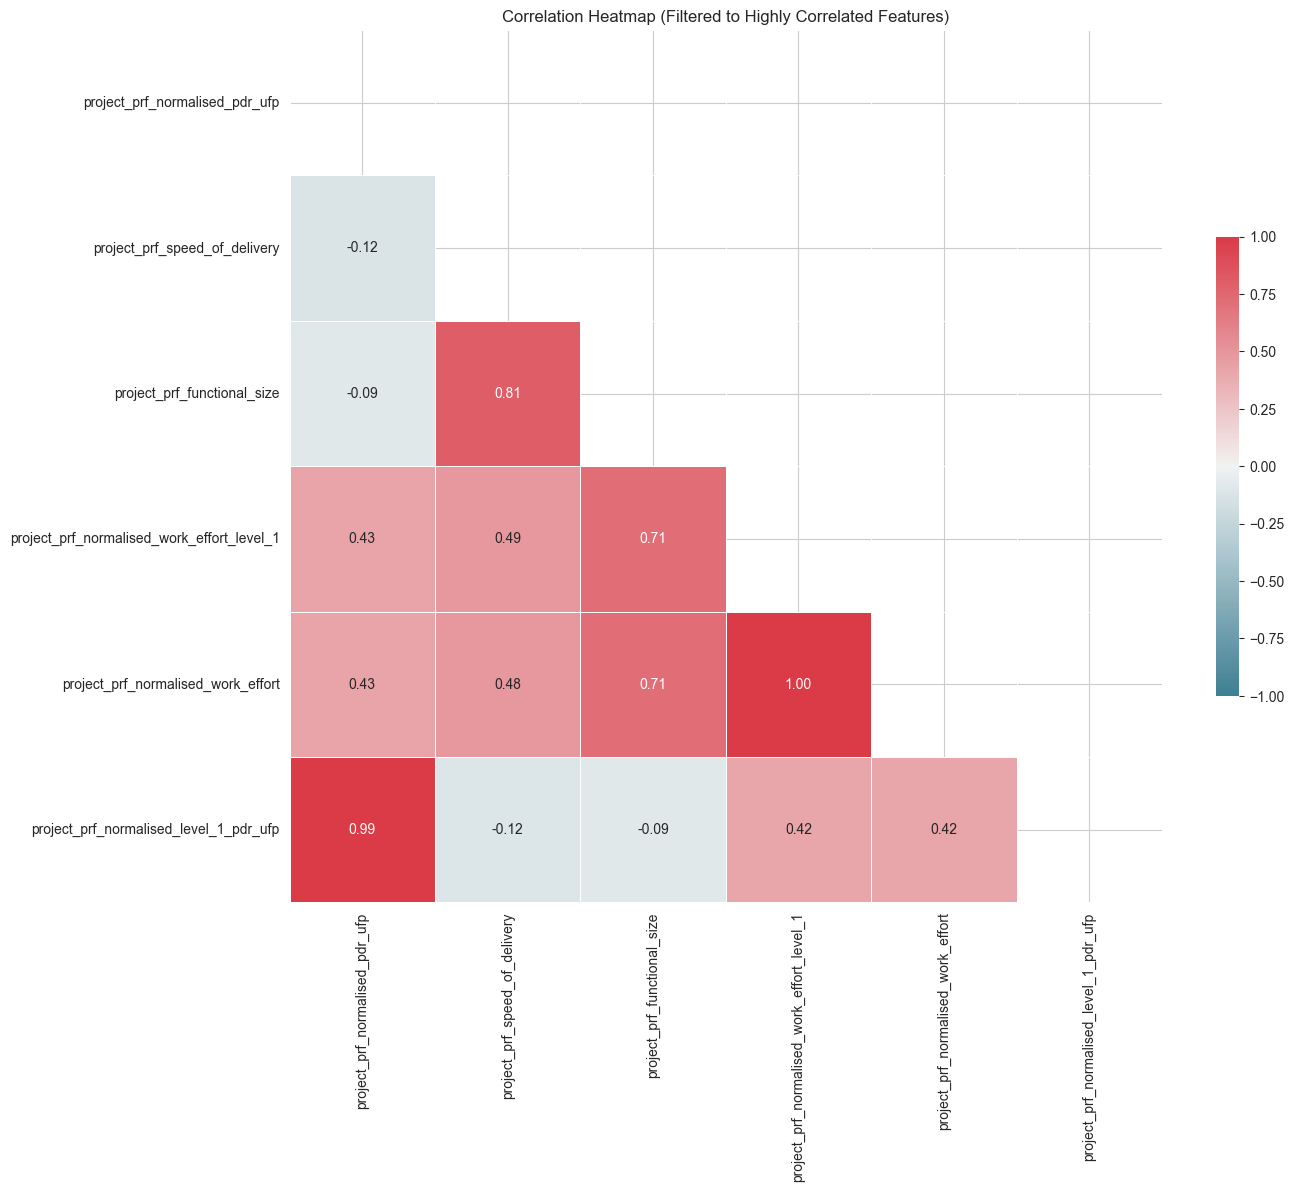

Correlation heatmap saved as ../plots/synthetic_financial_correlation_heatmap.png
Number of samples (rows): 10000
Number of features (columns): 23
Minimum number of rows needed to calculate VIF: 24


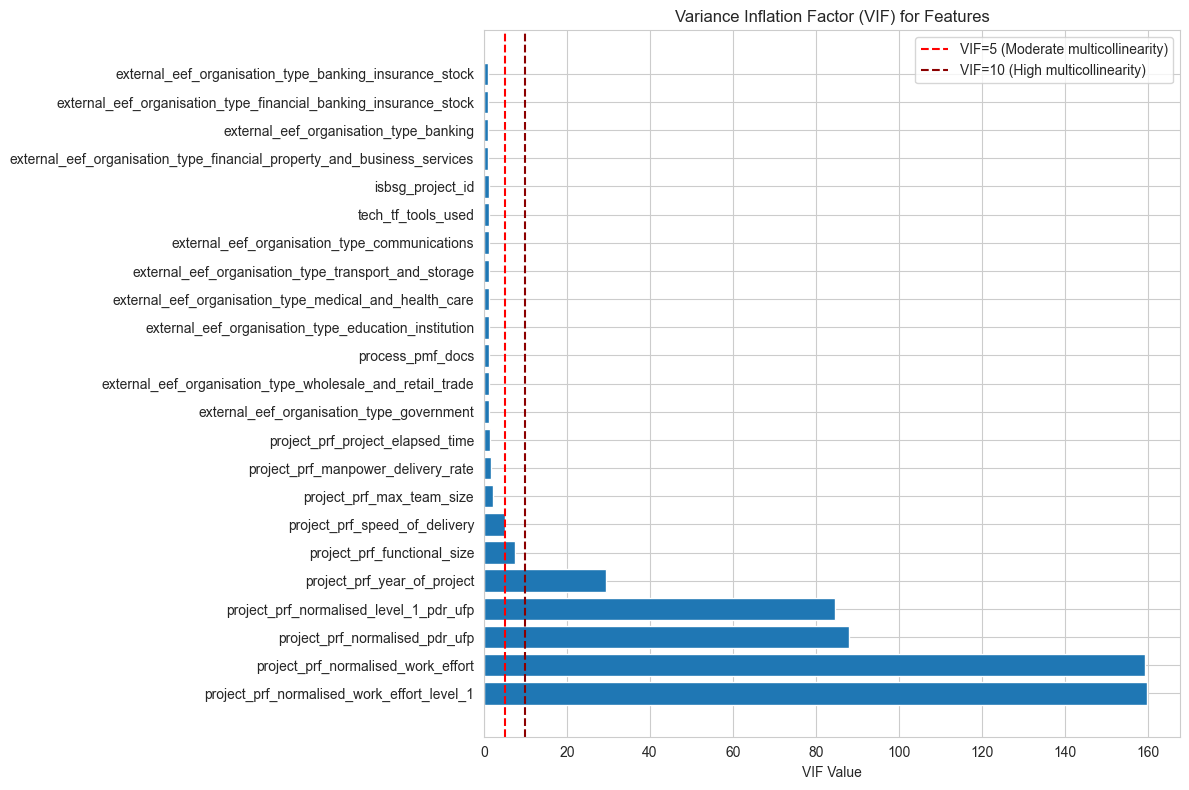

VIF values plot saved as ../plots/synthetic_financial_vif_values.png

Found 5 feature pairs with correlation > 0.7:
  • project_prf_normalised_work_effort_level_1 and project_prf_normalised_work_effort: 0.9962
  • project_prf_normalised_level_1_pdr_ufp and project_prf_normalised_pdr_ufp: 0.9926
  • project_prf_functional_size and project_prf_speed_of_delivery: 0.8071
  • project_prf_functional_size and project_prf_normalised_work_effort: 0.7135
  • project_prf_functional_size and project_prf_normalised_work_effort_level_1: 0.7130

Features with high VIF (> 10):
  • project_prf_normalised_work_effort_level_1: 159.81
  • project_prf_normalised_work_effort: 159.25
  • project_prf_normalised_pdr_ufp: 88.09
  • project_prf_normalised_level_1_pdr_ufp: 84.55
  • project_prf_year_of_project: 29.47

--- Multicollinearity Analysis Recommendations ---
Consider addressing multicollinearity by:
1. Removing one feature from each highly correlated pair
2. Creating new features by combining correlated

In [24]:
print("\nAnalyzing feature correlations...")

try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    # Use your input DataFrame (before PyCaret setup)
    df_fixed = df

    # Optionally drop columns you know you want to ignore here, e.g.
    # df_fixed = df_fixed.drop(columns=ignore_cols, errors='ignore')

    # Create directory for plots
    os.makedirs(plots_folder, exist_ok=True)

    # Only numeric columns for analysis
    X_numeric = df_fixed.select_dtypes(include=[np.number])

    # --- Drop columns that are all NaN ---
    X_numeric = X_numeric.dropna(axis=1, how='all')

    # --- Replace inf/-inf with NaN and impute missing values with mean ---
    X_numeric_clean = X_numeric.replace([np.inf, -np.inf], np.nan)
    X_numeric_clean = X_numeric_clean.fillna(X_numeric_clean.mean())

    # Diagnostic prints
    print(f"Rows after dropping all-NaN columns: {X_numeric_clean.shape[0]}")
    print(f"Columns after dropping all-NaN columns: {X_numeric_clean.shape[1]}")
    print("Any column with all NaNs?", X_numeric_clean.isnull().all().any())
    print("Missing value count per column after cleaning:")
    print(X_numeric_clean.isnull().sum())

    # Number of features
    n_features = X_numeric_clean.shape[1]
    print(f"Analysing correlations among {n_features} numeric features")

    # Calculate correlation matrix
    corr_matrix = X_numeric_clean.corr()

    # Find highly correlated feature pairs
    correlation_threshold = 0.7
    high_corr_pairs = []
    for i in range(n_features):
        for j in range(i+1, n_features):
            if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                high_corr_pairs.append((
                    X_numeric_clean.columns[i],
                    X_numeric_clean.columns[j],
                    corr_matrix.iloc[i, j]
                ))

    # Plot correlation heatmap
    plt.figure(figsize=(14, 12))
    mask = np.triu(corr_matrix)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    if n_features > 20:
        print(f"Large number of features detected ({n_features}). Creating filtered correlation matrix.")
        high_corr_features = set()
        for feat1, feat2, _ in high_corr_pairs:
            high_corr_features.add(feat1)
            high_corr_features.add(feat2)
        if high_corr_features:
            high_corr_features = list(high_corr_features)
            filtered_corr = corr_matrix.loc[high_corr_features, high_corr_features]
            sns.heatmap(filtered_corr, mask=np.triu(filtered_corr),
                        cmap=cmap, vmax=1, vmin=-1, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5},
                        annot=True, fmt=".2f")
            plt.title('Correlation Heatmap (Filtered to Highly Correlated Features)')
        else:
            sns.heatmap(corr_matrix, mask=mask,
                        cmap=cmap, vmax=1, vmin=-1, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5})
            plt.title('Correlation Heatmap (All Features)')
    else:
        sns.heatmap(corr_matrix, mask=mask,
                    cmap=cmap, vmax=1, vmin=-1, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},
                    annot=True, fmt=".2f")
        plt.title('Correlation Heatmap (All Features)')

    plt.tight_layout()
    plt.savefig(f"{plots_folder}/{file_name_no_ext}_correlation_heatmap.png")
    plt.show()
    plt.close()
    print(f"Correlation heatmap saved as {plots_folder}/{file_name_no_ext}_correlation_heatmap.png")

    # --- VIF calculation ---
    n_rows = X_numeric_clean.shape[0]
    n_features = X_numeric_clean.shape[1]
    min_rows_needed = n_features + 1
    print(f"Number of samples (rows): {n_rows}")
    print(f"Number of features (columns): {n_features}")
    print(f"Minimum number of rows needed to calculate VIF: {min_rows_needed}")

    vif_data = None
    if n_rows > n_features:
        try:
            from statsmodels.stats.outliers_influence import variance_inflation_factor

            vif_data = pd.DataFrame()
            vif_data["Feature"] = X_numeric_clean.columns
            vif_data["VIF"] = [variance_inflation_factor(X_numeric_clean.values, i)
                               for i in range(X_numeric_clean.shape[1])]

            vif_data = vif_data.sort_values("VIF", ascending=False)

            plt.figure(figsize=(12, 8))
            plt.barh(vif_data["Feature"], vif_data["VIF"])
            plt.axvline(x=5, color='r', linestyle='--', label='VIF=5 (Moderate multicollinearity)')
            plt.axvline(x=10, color='darkred', linestyle='--', label='VIF=10 (High multicollinearity)')
            plt.xlabel('VIF Value')
            plt.title('Variance Inflation Factor (VIF) for Features')
            plt.legend()
            plt.tight_layout()
            plt.savefig(f"{plots_folder}/{file_name_no_ext}_vif_values.png")
            plt.show()
            plt.close()
            print(f"VIF values plot saved as {plots_folder}/{file_name_no_ext}_vif_values.png")
        except Exception as vif_err:
            print(f"Could not calculate VIF: {vif_err}")
    else:
        print("Not enough samples to calculate VIF (need more samples than features)")

    # Print results
    print(f"\nFound {len(high_corr_pairs)} feature pairs with correlation > {correlation_threshold}:")
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"  • {feat1} and {feat2}: {corr:.4f}")

    if vif_data is not None:
        high_vif_threshold = 10
        high_vif_features = vif_data[vif_data["VIF"] > high_vif_threshold]
        if not high_vif_features.empty:
            print(f"\nFeatures with high VIF (> {high_vif_threshold}):")
            for _, row in high_vif_features.iterrows():
                print(f"  • {row['Feature']}: {row['VIF']:.2f}")
        else:
            print(f"\nNo features have VIF > {high_vif_threshold}")

    print("\n--- Multicollinearity Analysis Recommendations ---")
    if high_corr_pairs:
        print("Consider addressing multicollinearity by:")
        print("1. Removing one feature from each highly correlated pair")
        print("2. Creating new features by combining correlated features")
        print("3. Applying dimensionality reduction techniques like PCA")
        if len(high_corr_pairs) > 0:
            print("\nPotential candidates for removal:")
            freq = {}
            for feat1, feat2, _ in high_corr_pairs:
                freq[feat1] = freq.get(feat1, 0) + 1
                freq[feat2] = freq.get(feat2, 0) + 1
            freq_df = pd.DataFrame({'Feature': list(freq.keys()),
                                    'Frequency in high corr pairs': list(freq.values())})
            freq_df = freq_df.sort_values('Frequency in high corr pairs', ascending=False)
            for _, row in freq_df.head(5).iterrows():
                print(f"  • {row['Feature']} (appears in {row['Frequency in high corr pairs']} high correlation pairs)")
    else:
        print("No significant multicollinearity detected based on correlation analysis.")

    if vif_data is not None and not high_vif_features.empty:
        print("\nBased on VIF analysis, consider removing or transforming these features with high VIF values.")

except Exception as e:
    print(f"Feature correlation analysis failed: {e}")

In [25]:
# Save this DataFrame with fixed column names

df_fixed.to_csv(f'{data_folder}/{file_name_no_ext}_fixed_columns_data.csv', index=False)
print(f"Saved data with fixed column names to '{data_folder}/{file_name_no_ext}_fixed_columns_data.csv'")

Saved data with fixed column names to '../data/synthetic_financial_fixed_columns_data.csv'
Cell executed at: 2025-07-08 10:39:03.411140


[Back to top](#Index:)

<a id='part4'></a>

# Part 4 - Data Profiling

xxx

In [26]:
# ## Data Profiling (Optional)

try:
    from ydata_profiling import ProfileReport
    
    print("\nGenerating data profile report...")
    profile = ProfileReport(df_clean, title="ISBSG-SDV Dataset Profiling Report", minimal=True)
    profile.to_file(f"{data_folder}/{file_name_no_ext}_data_profile_sdv.html")
    print(f"Data profile report saved to '{data_folder}/{file_name_no_ext}_data_profile_sdv.html'")
except ImportError:
    print("\nSkipping data profiling (ydata_profiling not installed)")
    print("To install: pip install ydata-profiling")


Generating data profile report...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/91 [00:00<?, ?it/s]
%|█▏        | 11/91 [00:00<00:00, 99.88it/s]
100%|██████████| 91/91 [00:00<00:00, 298.82it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data profile report saved to '../data/synthetic_financial_data_profile_sdv.html'
Cell executed at: 2025-07-08 10:39:25.779128


[Back to top](#Index:)

<a id='part5'></a>

# Part 5 - PyCaret setup

xxx

In [27]:
print(sklearn.__version__)
print(pycaret.__version__)  

1.4.2
3.3.2
Cell executed at: 2025-07-08 10:39:25.788781


In [28]:
# Show all column names and highlight duplicates
dupes = df_fixed.columns[df_fixed.columns.duplicated()].tolist()
print("Duplicate columns:", dupes)


Duplicate columns: []
Cell executed at: 2025-07-08 10:39:25.797785


In [29]:
# Remove leading/trailing whitespace and unify columns
df_fixed.columns = [col.strip().lower() for col in df_fixed.columns]
print(df_fixed.columns.tolist())


['isbsg_project_id', 'project_prf_year_of_project', 'project_prf_application_type', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_speed_of_delivery', 'project_prf_manpower_delivery_rate', 'project_prf_project_elapsed_time', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_tools_used', 'external_eef_organisation_type_banking_insurance_stock', 'external_eef_organisation_type_banking', 'external_eef_organisation_type_communications', 'external_eef_organisation_type_education_institution', 'external_eef_organisation_type_financial_banking_insurance_stock', 'external_eef_organisation_type_financial_property_and_business_services', 'external_eef_organisation_type_government', 'external_eef_organisation_type_medical_and_health_care', 'external_eef_organisation_type_transport_and_storage', 

In [30]:
# Check for duplicate columns, might require to run multiple times until no duplicate columns found.
dupes = df_fixed.columns[df_fixed.columns.duplicated()].tolist()
if dupes:
    print("Duplicate columns found:", dupes)
    # Drop duplicates, keep first occurrence
    df_fixed = df_fixed.loc[:, ~df_fixed.columns.duplicated()]


Duplicate columns found: ['project_prf_application_group_business_application', 'project_prf_application_group_missing']
Cell executed at: 2025-07-08 10:39:25.823278


In [31]:
import pandas as pd
import numpy as np
from pycaret.regression import setup, get_config
from sklearn.preprocessing import StandardScaler
import os
import joblib

def fix_mixed_type_columns_simple(df):
    """Fix mixed type columns before PyCaret setup"""
    df_copy = df.copy()
    
    # List of problematic mixed-type columns
    mixed_type_cols = [
        'external_eef_industry_sector',
        'tech_tf_client_roles', 
        'tech_tf_clientserver_description',
        'tech_tf_development_platform_hand_held'
    ]
    
    print("Fixing mixed type columns...")
    
    for col in mixed_type_cols:
        if col in df_copy.columns:
            print(f"Processing {col}")
            
            # For the boolean column
            if col == 'tech_tf_development_platform_hand_held':
                df_copy[col] = df_copy[col].fillna(False).astype(bool)
            else:
                # For string columns with float NaN values
                df_copy[col] = df_copy[col].astype(str)
                df_copy[col] = df_copy[col].replace('nan', np.nan)
    
    return df_copy

# Configuration - Update these paths as needed
config_folder = "../config"
models_folder = "../models"
TARGET_COL = 'project_prf_normalised_work_effort'  # Update if different
FINANCE_PIPELINE = 'finance_enhanced_fitted_pipeline.pkl'

# Create folders if they don't exist
os.makedirs(config_folder, exist_ok=True)
os.makedirs(models_folder, exist_ok=True)

# Fix your dataframe (assuming df_fixed exists)
df_fixed_types = fix_mixed_type_columns_simple(df_fixed)

# Define ignore columns
ignore_cols = ['isbsg_project_id', 'external_eef_data_quality_rating', 'external_eef_data_quality_rating_b', 
               'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_level_1_pdr_ufp', 
               'project_prf_normalised_pdr_ufp', 'project_prf_project_elapsed_time', 
               'people_prf_ba_team_experience_less_than_1_yr', 'people_prf_ba_team_experience_1_to_3_yr', 
               'people_prf_ba_team_experience_great_than_3_yr', 'people_prf_it_experience_less_than_1_yr', 
               'people_prf_it_experience_1_to_3_yr', 'people_prf_it_experience_great_than_3_yr', 
               'people_prf_it_experience_less_than_3_yr', 'people_prf_it_experience_3_to_9_yr', 
               'people_prf_it_experience_great_than_9_yr', 'people_prf_project_manage_experience', 
               'project_prf_total_project_cost', 'project_prf_cost_currency', 'project_prf_currency_multiple', 
               'project_prf_speed_of_delivery', 'people_prf_project_manage_changes', 
               'project_prf_defect_density', 'project_prf_manpower_delivery_rate']

# Make column names lowercase
df_fixed_types.columns = [col.lower() for col in df_fixed_types.columns]
ignore_cols = [col.lower() for col in ignore_cols]
TARGET_COL = TARGET_COL.lower()

print(f"DataFrame shape: {df_fixed_types.shape}")
print(f"Target column: {TARGET_COL}")
print(f"Ignore columns: {len(ignore_cols)}")

# Let PyCaret auto-detect column types
try:
    print("Attempting PyCaret setup with auto-detection...")
    setup_results = setup(
        data=df_fixed_types,
        target=TARGET_COL,
        ignore_features=ignore_cols,
        session_id=123,
        preprocess=True,
        normalize=True,
        normalize_method='zscore',
        imputation_type='simple',
        numeric_imputation='mean',
        categorical_imputation='mode',
        verbose=True
    )
    
    print("✅ PyCaret setup successful!")
    
    # Get the fitted pipeline from PyCaret
    preprocessor = get_config('pipeline')
    
    # Save the whole pipeline
    pipeline_filename = os.path.join(config_folder, FINANCE_PIPELINE)
    joblib.dump(preprocessor, pipeline_filename)
    print(f"Full PyCaret pipeline saved to: {pipeline_filename}")
    
    # Save the scaler
    scaler_model = preprocessor.named_steps['normalize'].transformer
    scaler_filename = os.path.join(models_folder, 'standard_scaler.pkl')
    joblib.dump(scaler_model, scaler_filename)
    print(f"Scaler model saved to: {scaler_filename}")
    
    print(f"Scaler type: {type(scaler_model)}")
    if isinstance(scaler_model, StandardScaler):
        print(f"Scaler features: {len(scaler_model.mean_)} features")
        print(f"First 5 means: {scaler_model.mean_[:5]}")
        print(f"First 5 scales: {scaler_model.scale_[:5]}")
    
    # ========== SAVE PROCESSED CSV FILES ==========
    try:
        print("\nSaving processed data as CSV files...")
        
        # Get the processed data from PyCaret
        X_train = get_config('X_train') 
        y_train = get_config('y_train')
        X_test = get_config('X_test')
        y_test = get_config('y_test')
        
        # Combine train and test for full processed dataset
        X_processed = pd.concat([X_train, X_test], ignore_index=True)
        y_processed = pd.concat([y_train, y_test], ignore_index=True)
        
        # Save processed features and target
        features_filename = os.path.join(config_folder, 'finance_enhanced_pycaret_processed_features.csv')
        target_filename = os.path.join(config_folder, 'finance_enhanced_pycaret_processed_target.csv')
        
        X_processed.to_csv(features_filename, index=False)
        y_processed.to_csv(target_filename, index=False)
        
        print(f"✅ Processed features saved to: {features_filename}")
        print(f"✅ Processed target saved to: {target_filename}")
        print(f"Features shape: {X_processed.shape}")
        print(f"Target shape: {y_processed.shape}")
        print(f"Feature columns: {list(X_processed.columns[:10])}...")  # Show first 10
        
    except Exception as csv_error:
        print(f"❌ Failed to save processed CSV files: {csv_error}")
    
except Exception as e:
    print(f"❌ Setup failed: {e}")
    
    # If it still fails, try without normalization
    print("\nTrying without normalization...")
    try:
        setup_results = setup(
            data=df_fixed_types,
            target=TARGET_COL,
            ignore_features=ignore_cols,
            session_id=123,
            preprocess=True,
            normalize=False,  # Disable normalization
            imputation_type='simple',
            numeric_imputation='mean',
            categorical_imputation='mode',
            verbose=True
        )
        print("✅ Setup successful without normalization!")
        
        # Save pipeline
        preprocessor = get_config('pipeline')
        pipeline_filename = os.path.join(config_folder, f"finance_enhanced_pipeline_no_norm.pkl")
        joblib.dump(preprocessor, pipeline_filename)
        print(f"Pipeline saved to: {pipeline_filename}")
        
        # Save processed CSV files
        try:
            print("\nSaving processed data as CSV files...")
            
            X_train = get_config('X_train') 
            y_train = get_config('y_train')
            X_test = get_config('X_test')
            y_test = get_config('y_test')
            
            X_processed = pd.concat([X_train, X_test], ignore_index=True)
            y_processed = pd.concat([y_train, y_test], ignore_index=True)
            
            features_filename = os.path.join(config_folder, 'finance_enhanced_pycaret_processed_features.csv')
            target_filename = os.path.join(config_folder, 'finance_enhanced_pycaret_processed_target.csv')
            
            X_processed.to_csv(features_filename, index=False)
            y_processed.to_csv(target_filename, index=False)
            
            print(f"✅ Processed features saved to: {features_filename}")
            print(f"✅ Processed target saved to: {target_filename}")
            
        except Exception as csv_error:
            print(f"❌ Failed to save CSV files: {csv_error}")
        
    except Exception as e2:
        print(f"❌ Setup failed even without normalization: {e2}")
        
        # Last resort: minimal setup
        print("\nTrying minimal setup...")
        try:
            setup_results = setup(
                data=df_fixed_types,
                target=TARGET_COL,
                ignore_features=ignore_cols,
                session_id=123,
                preprocess=False,  # Disable all preprocessing
                verbose=True
            )
            print("✅ Minimal setup successful!")
            
            # Save minimal pipeline
            preprocessor = get_config('pipeline')
            pipeline_filename = os.path.join(config_folder, f"finance_enhanced_pipeline_minimal.pkl")
            joblib.dump(preprocessor, pipeline_filename)
            print(f"Minimal pipeline saved to: {pipeline_filename}")
            
        except Exception as e3:
            print(f"❌ All setup attempts failed: {e3}")

print("\n" + "="*50)
print("SETUP COMPLETE")
print("="*50)
print("Files that should now exist:")
print(f"- {config_folder}/finance_enhanced_pycaret_processed_features.csv")
print(f"- {config_folder}/finance_enhanced_pycaret_processed_target.csv") 
print(f"- {config_folder}/{FINANCE_PIPELINE}")
print(f"- {models_folder}/standard_scaler.pkl")
print("\nYou can now use these CSV files for SHAP analysis!")

Fixing mixed type columns...
DataFrame shape: (10000, 89)
Target column: project_prf_normalised_work_effort
Ignore columns: 24
Attempting PyCaret setup with auto-detection...


,Description,Value
0,Session id,123
1,Target,project_prf_normalised_work_effort
2,Target type,Regression
3,Original data shape,"(10000, 89)"
4,Transformed data shape,"(10000, 95)"
5,Transformed train set shape,"(7000, 95)"
6,Transformed test set shape,"(3000, 95)"
7,Ignore features,24
8,Numeric features,15
9,Categorical features,2


✅ PyCaret setup successful!
Full PyCaret pipeline saved to: ../config\finance_enhanced_fitted_pipeline.pkl
Scaler model saved to: ../models\standard_scaler.pkl
Scaler type: <class 'sklearn.preprocessing._data.StandardScaler'>
Scaler features: 94 features
First 5 means: [2.01400000e+03 5.75714286e-01 5.88571429e-02 7.97142857e-02
 1.00000000e-02]
First 5 scales: [1.         0.4942341  0.23535713 0.27085036 0.09949874]

Saving processed data as CSV files...
✅ Processed features saved to: ../config\finance_enhanced_pycaret_processed_features.csv
✅ Processed target saved to: ../config\finance_enhanced_pycaret_processed_target.csv
Features shape: (10000, 80)
Target shape: (10000,)
Feature columns: ['project_prf_year_of_project', 'project_prf_application_type', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_tools_used', 'external_eef_organisation_type_banking_insurance_stock', 'external_eef_organisation_type_ba

[Back to top](#Index:)

<a id='part6'></a>

# Part 6 - Model Building with PyCaret

xxx

In [32]:
from pycaret.regression import *
from sklearn.base import BaseEstimator
import joblib
import json
import time

# Start timing
start_time = time.time()

# Create output directories if needed
os.makedirs(data_folder, exist_ok=True)
os.makedirs(models_folder, exist_ok=True)
os.makedirs(skeleton_models_folder, exist_ok=True)
os.makedirs(logs_folder, exist_ok=True)


# Get preprocessed data for inspection and saving
X = get_config("X")
y = get_config("y")

# Print all feature names ---
print("All preprocessed feature names (as list):", X.columns.tolist())


X.to_csv(f"{data_folder}/pycaret_processed_features_before_model_training.csv", index=False)
y.to_csv(f"{data_folder}/pycaret_processed_target_before_model_training.csv", index=False)
print(f"\nPreprocessed data shape: {X.shape}")
print(f"Numeric features: {len(X.select_dtypes(include=[float, int]).columns)}")
print(f"Categorical features: {len(X.select_dtypes(include=['object', 'category']).columns)}")
print("Preprocessed features and target saved.")


# 1. Compare and select top 3 models (returns list of models)
print("\nComparing regression models and selecting top 3...")
top_models = compare_models(n_select=3)
model_results = pull()
model_results.to_csv(f"{logs_folder}/model_comparison_results.csv")
print("\nModel comparison results:")
print(model_results)

# 2. For each top model: tune, evaluate, and save
tuned_models = []
scores = []

for i, model in enumerate(top_models, 1):
    model_name = type(model).__name__
    print(f"\nModel {i}: {model_name}")
    
    # Tune
    print("  Tuning...")
    tuned = tune_model(model, n_iter=10)
    tuned_models.append(tuned)

    # Pull results after tuning - get the mean values
    tuned_results = pull()
    tuned_mae = tuned_results.iloc[-2]['MAE']  # The "Mean" row
    tuned_rmse = tuned_results.iloc[-2]['RMSE']
    tuned_r2 = tuned_results.iloc[-2]['R2']
    
    tuned_results.to_csv(f'{logs_folder}/tuned_results_model_{i}_{model_name}.csv')
    
    # Extract metrics from "Mean" column instead of "Value"
    try:
        # First try to access by 'Mean' column which is the typical format
        scores.append({
            'Model': model_name, 
            'MAE': tuned_mae,
            'RMSE': tuned_rmse,
            'R2': tuned_r2
        })
    except KeyError:
        # As a fallback, check the structure of tuned_results
        print(f"  Warning: Expected column structure not found in tuned results")
        print(f"  tuned_results columns: {tuned_results.columns}")
        print(f"  tuned_results index: {tuned_results.index}")
        
        # Try alternative approaches based on the actual structure
        if 'Mean' in tuned_results.columns:
            scores.append({
                'Model': model_name,
                'MAE': tuned_results.loc['MAE', 'Mean'] if 'MAE' in tuned_results.index else None,
                'RMSE': tuned_results.loc['RMSE', 'Mean'] if 'RMSE' in tuned_results.index else None,
                'R2': tuned_results.loc['R2', 'Mean'] if 'R2' in tuned_results.index else None
            })
        elif len(tuned_results.columns) > 0:
            # Get the last column as it might contain mean values
            last_col = tuned_results.columns[-1]
            scores.append({
                'Model': model_name,
                'MAE': tuned_results.loc['MAE', last_col] if 'MAE' in tuned_results.index else None,
                'RMSE': tuned_results.loc['RMSE', last_col] if 'RMSE' in tuned_results.index else None,
                'R2': tuned_results.loc['R2', last_col] if 'R2' in tuned_results.index else None
            })
        else:
            # If we still can't find the right structure, log the issue
            scores.append({
                'Model': model_name,
                'MAE': None,
                'RMSE': None,
                'R2': None
            })
            print(f"  Unable to extract metrics for {model_name}. Check the saved CSV for details.")
    
    # Before saving, check what the model input features
    print("Before saving:")
    print(f"Model type: {type(tuned)}")

    # Try to get feature names before saving
    try:
        if hasattr(tuned, 'feature_names_in_'):
            print(f"Features before save: {tuned.feature_names_in_}")
            print(f"Number of features: {len(tuned.feature_names_in_)}")
    except:
        print("Could not get features before save")
    
    # Save tuned model
    save_model(tuned, f"{models_folder}/top_model_{i}_{model_name}")
    print(f"  Saved as {models_folder}/top_model_{i}_{model_name}.pkl")
    print(f"  Time elapsed: {time.time() - start_time:.1f} seconds")

    print("After saving:")
    verify_loaded_model = load_model(f"{models_folder}/top_model_{i}_{model_name}")
    try:
        if hasattr(verify_loaded_model, 'feature_names_in_'):
            print(f"Features loaded from pkl file: { verify_loaded_model.feature_names_in_}")
            print(f"Number of features: {len(verify_loaded_model.feature_names_in_)}")
    except:
        print("Could not get features after save the model")

    # just save skeleton mode
    final_model = finalize_model(tuned)  # This removes PyCaret wrapper
    sklearn_model = final_model[-1]  # Extract just the sklearn model

    # Save the expected feature names for the model (as seen during fit)
    if hasattr(final_model, 'feature_names_in_'):
        model_feature_names = list(final_model.feature_names_in_)
    elif hasattr(sklearn_model, 'feature_names_in_'):
        model_feature_names = list(sklearn_model.feature_names_in_)
    else:
        # fallback: you must get the column order from your pipeline/X_train
        model_feature_names = None
        print("WARNING: feature_names_in_ not found on model! You must record feature list some other way.")
        
    print(f"Number of features: {len(sklearn_model.feature_names_in_)}")

    # Save model
    model_path = f"{skeleton_models_folder}/top_model_skeleton_{i}_{model_name}.pkl"
    joblib.dump(sklearn_model, model_path)
    print(f"  Saved model as {model_path}")

    # Save feature names (if found)
    if model_feature_names is not None:
        features_path = model_path.replace('.pkl', '_features.json')
        with open(features_path, 'w') as f:
            json.dump(model_feature_names, f)
        print(f"  Saved feature names as {features_path}")

    # When loading - you'll need to handle preprocessing separately
    sklearn_model_loaded = joblib.load(f"{skeleton_models_folder}/top_model_skeleton_{i}_{model_name}.pkl")
    print("\nAfter loading:")
    try:
        if hasattr(sklearn_model_loaded, 'feature_names_in_'):  # Fixed variable name
            print(f"Features after skeleton load: {sklearn_model_loaded.feature_names_in_}")  # Fixed variable name
            print(f"Number of features: {len(sklearn_model_loaded.feature_names_in_)}")
        else:
            print("No feature_names_in_ attribute found")
    except Exception as e:
        print(f"Could not get features after load: {e}")


# Save overall summary of all tuned models
score_df = pd.DataFrame(scores)
score_df.to_csv(f"{logs_folder}/tuned_model_scores.csv", index=False)
print("\nTuned models summary:\n", score_df)
print("\nAll top 3 models have been tuned, evaluated, and saved.")
print("\nAnalysis complete! Proceed with feature importance or SHAP analysis as next steps.")

# 3. Optionally: Pull the best model for additional analysis (feature importance, SHAP, etc.)
# You can access the best model as top_models[0] or reload any saved model later



All preprocessed feature names (as list): ['project_prf_year_of_project', 'project_prf_application_type', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_tools_used', 'external_eef_organisation_type_banking_insurance_stock', 'external_eef_organisation_type_banking', 'external_eef_organisation_type_communications', 'external_eef_organisation_type_education_institution', 'external_eef_organisation_type_financial_banking_insurance_stock', 'external_eef_organisation_type_financial_property_and_business_services', 'external_eef_organisation_type_government', 'external_eef_organisation_type_medical_and_health_care', 'external_eef_organisation_type_transport_and_storage', 'external_eef_organisation_type_wholesale_and_retail_trade', 'external_eef_industry_sector_banking', 'external_eef_industry_sector_financial', 'project_prf_application_group_business_application', 'project_prf_application_group_infrastructure_so

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2134.0353,10420185.4084,3226.6271,0.6705,1.0532,2.0799,0.2700
gbr,Gradient Boosting Regressor,2169.7069,10511894.9528,3240.8030,0.6681,1.1077,2.4743,0.5880
llar,Lasso Least Angle Regression,2317.7495,10993553.7379,3313.8405,0.6529,1.3101,4.8230,0.0780
br,Bayesian Ridge,2318.8761,10992867.1919,3313.7522,0.6529,1.3058,4.8197,0.1230
lasso,Lasso Regression,2317.7288,10993324.3838,3313.8058,0.6529,1.3097,4.8230,0.1160
lr,Linear Regression,2318.5616,10996014.5755,3314.2124,0.6528,1.3115,4.8335,1.1920
ridge,Ridge Regression,2318.8571,10995701.3605,3314.1657,0.6528,1.3088,4.8398,0.0640
lar,Least Angle Regression,2318.8587,10995771.7012,3314.1761,0.6528,1.3088,4.8401,0.0650
rf,Random Forest Regressor,2263.3758,11253918.7275,3353.4366,0.6442,1.0908,2.3387,2.4550
et,Extra Trees Regressor,2266.6290,11277757.0097,3357.2686,0.6436,1.0996,2.3967,3.0780



Model comparison results:
                                    Model        MAE           MSE       RMSE  \
lightgbm  Light Gradient Boosting Machine  2134.0353  1.042019e+07  3226.6271   
gbr           Gradient Boosting Regressor  2169.7069  1.051189e+07  3240.8030   
llar         Lasso Least Angle Regression  2317.7495  1.099355e+07  3313.8405   
br                         Bayesian Ridge  2318.8761  1.099287e+07  3313.7522   
lasso                    Lasso Regression  2317.7288  1.099332e+07  3313.8058   
lr                      Linear Regression  2318.5616  1.099601e+07  3314.2124   
ridge                    Ridge Regression  2318.8571  1.099570e+07  3314.1657   
lar                Least Angle Regression  2318.8587  1.099577e+07  3314.1761   
rf                Random Forest Regressor  2263.3758  1.125392e+07  3353.4366   
et                  Extra Trees Regressor  2266.6290  1.127776e+07  3357.2686   
huber                     Huber Regressor  2220.6289  1.131964e+07  3362.2269   
o

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2203.2017,11009277.4879,3318.0231,0.6961,1.0683,2.2129
1,2213.8353,10934742.7301,3306.7723,0.6515,1.1104,2.1069
2,2109.7631,10242957.2148,3200.4620,0.6627,1.1443,2.6165
3,2046.7373,9596858.5661,3097.8797,0.6922,1.0278,1.9830
4,2177.3657,9865684.3087,3140.9687,0.6919,1.1012,2.2731
5,2145.1252,10228903.2715,3198.2657,0.7138,1.2288,3.2950
6,2198.1788,12006876.8028,3465.0941,0.6036,1.0700,2.0534
7,2093.1121,10321832.8350,3212.7609,0.6658,1.1187,2.4495
8,2070.3730,9492921.3973,3081.0585,0.6799,1.0619,2.1193


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Before saving:
Model type: <class 'lightgbm.sklearn.LGBMRegressor'>
Features before save: ['project_prf_year_of_project'
 'project_prf_application_type_financial_transaction_process/accounting'
 'project_prf_application_type_business_application'
 'project_prf_application_type_surveillance_and_security'
 'project_prf_application_type_operating_system_or_software_utility'
 'project_prf_application_type_online_analysis_and_reporting'
 'project_prf_application_type_financial_transaction_process/accounting;_workflow_support_&_management'
 'project_prf_application_type_cards_and_payments'
 'project_prf_application_type_missing'
 'project_prf_application_type_customer_billing/relationship_management'
 'project_prf_application_type_management_or_performance_reporting'
 'project_prf_application_type_mobile_application'
 'project_prf_application_type_auditing_management'
 'project_prf_application_type_electronic_data_interchange'
 '

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2318.7874,12623874.7713,3553.0093,0.6515,1.1211,2.3204
1,2347.8469,12266773.5230,3502.3954,0.6090,1.0984,2.1591
2,2170.5131,11719358.1873,3423.3548,0.6141,1.1567,2.3363
3,2146.4693,10755661.8419,3279.5826,0.6551,1.0522,2.2592
4,2290.1106,11315581.2498,3363.8640,0.6466,1.1193,2.2678
5,2229.2951,10836845.8702,3291.9365,0.6968,1.1941,2.6111
6,2328.7590,12655454.2694,3557.4505,0.5822,1.0946,1.9431
7,2241.6957,11875350.2542,3446.0630,0.6155,1.1435,2.3759
8,2188.5936,10319987.1331,3212.4737,0.6520,1.0922,2.3755


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Before saving:
Model type: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Features before save: ['project_prf_year_of_project'
 'project_prf_application_type_financial transaction process/accounting'
 'project_prf_application_type_business application'
 'project_prf_application_type_surveillance and security'
 'project_prf_application_type_operating system or software utility'
 'project_prf_application_type_online analysis and reporting'
 'project_prf_application_type_financial transaction process/accounting; workflow support & management'
 'project_prf_application_type_cards and payments'
 'project_prf_application_type_missing'
 'project_prf_application_type_customer billing/relationship management'
 'project_prf_application_type_management or performance reporting'


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2449.5474,12688051.4911,3562.0291,0.6497,1.3327,5.4351
1,2284.2224,10354692.8290,3217.8709,0.6699,1.2744,4.2208
2,2296.5789,11166224.0379,3341.5900,0.6323,1.3523,5.9885
3,2261.7081,10430086.2379,3229.5644,0.6655,1.2890,4.5141
4,2324.7969,10584153.5695,3253.3296,0.6695,1.3108,5.1674
5,2306.9898,10881159.3212,3298.6602,0.6955,1.4525,5.8479
6,2346.7222,11427800.4273,3380.5030,0.6227,1.1921,3.4667
7,2304.8595,11402468.1330,3376.7541,0.6308,1.3355,4.7295
8,2235.5178,9886915.3184,3144.3466,0.6666,1.2666,3.9910


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Before saving:
Model type: <class 'sklearn.linear_model._least_angle.LassoLars'>
Features before save: ['project_prf_year_of_project'
 'project_prf_application_type_financial transaction process/accounting'
 'project_prf_application_type_business application'
 'project_prf_application_type_surveillance and security'
 'project_prf_application_type_operating system or software utility'
 'project_prf_application_type_online analysis and reporting'
 'project_prf_application_type_financial transaction process/accounting; workflow support & management'
 'project_prf_application_type_cards and payments'
 'project_prf_application_type_missing'
 'project_prf_application_type_customer billing/relationship management'
 'project_prf_application_type_management or performance reporting'
 'p

In [33]:
# Model Verification and Testing Scripts with Feature Lists

import joblib
import pandas as pd
import numpy as np
import os
import json
from pycaret.regression import load_model, predict_model

# Configuration
CONFIG_FOLDER = config_folder  # Change this to your desired config folder path

def comprehensive_model_test(models_folder, skeleton_models_folder, test_data_path=None):
    """
    Comprehensive testing of all saved models with feature lists
    """
    print("="*70)
    print("COMPREHENSIVE MODEL TESTING")
    print("="*70)
    
    # Load test data if provided
    if test_data_path and os.path.exists(test_data_path):
        test_data = pd.read_csv(test_data_path)
        print(f"✓ Test data loaded: {test_data.shape}")
    else:
        test_data = None
        print("⚠ No test data provided - using dummy data for predictions")
    
    results = []
    
    # Find all model files
    pycaret_models = [f for f in os.listdir(models_folder) if f.endswith('.pkl')]
    sklearn_models = [f for f in os.listdir(skeleton_models_folder) if f.endswith('.pkl')]
    
    print(f"\nFound {len(pycaret_models)} PyCaret models and {len(sklearn_models)} sklearn models")
    
    # Test PyCaret Models
    print("\n" + "="*50)
    print("TESTING PYCARET MODELS")
    print("="*50)
    
    for model_file in pycaret_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(models_folder, model_file)
        
        try:
            print(f"\nTesting: {model_name}")
            
            # Load model
            model = load_model(model_path.replace('.pkl', ''))
            
            # Extract features from the model
            features = extract_features_from_pycaret_model(model, model_path)
            
            # Check metadata if exists
            metadata_path = model_path.replace('.pkl', '_metadata.json')
            if os.path.exists(metadata_path):
                with open(metadata_path, 'r') as f:
                    metadata = json.load(f)
                print(f"  Features expected: {len(metadata['features'])}")
                print(f"  Saved on: {metadata['save_timestamp']}")
                
                # Compare with extracted features
                if features and len(features) != len(metadata['features']):
                    print(f"  ⚠ Feature count mismatch: extracted {len(features)} vs metadata {len(metadata['features'])}")
            
            # Print feature information
            if features:
                print(f"  ✓ Features found: {len(features)}")
                print(f"  Feature list: {features[:10]}{'...' if len(features) > 10 else ''}")
                
                # Save full feature list to CSV file in CONFIG_FOLDER
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Full feature list saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
            else:
                print(f"  ⚠ Could not extract features")
            
            # Test prediction
            if test_data is not None:
                predictions = predict_model(model, data=test_data.head(5))
                print(f"  ✓ Prediction successful: {predictions.shape}")
                
                # Check if prediction column exists
                pred_cols = [col for col in predictions.columns if 'prediction' in col.lower()]
                if pred_cols:
                    pred_values = predictions[pred_cols[0]].values
                    print(f"  Sample predictions: {pred_values[:3]}")
                else:
                    print("  ⚠ Could not find prediction column")
            else:
                print("  ⚠ Skipped prediction test (no test data)")
            
            # File size
            size_mb = os.path.getsize(model_path) / (1024 * 1024)
            
            results.append({
                'model_name': model_name,
                'model_type': 'PyCaret',
                'status': 'SUCCESS',
                'size_mb': round(size_mb, 2),
                'num_features': len(features) if features else 0,
                'features': features[:5] if features else [],  # Store first 5 features
                'error': None
            })
            
            print(f"  ✓ SUCCESS - Size: {size_mb:.2f} MB")
            
        except Exception as e:
            print(f"  ✗ FAILED: {e}")
            results.append({
                'model_name': model_name,
                'model_type': 'PyCaret',
                'status': 'FAILED',
                'size_mb': 0,
                'num_features': 0,
                'features': [],
                'error': str(e)
            })
    
    # Test Sklearn Models
    print("\n" + "="*50)
    print("TESTING SKLEARN MODELS")
    print("="*50)
    
    for model_file in sklearn_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(skeleton_models_folder, model_file)
        
        try:
            print(f"\nTesting: {model_name}")
            
            # Load model
            model = joblib.load(model_path)
            print(f"  Model type: {type(model)}")
            
            # Extract and display features
            features = extract_features_from_sklearn_model(model)
            
            if features:
                print(f"  ✓ Features found: {len(features)}")
                print(f"  Feature list: {features[:10]}{'...' if len(features) > 10 else ''}")
                
                # Save full feature list to CSV file in CONFIG_FOLDER
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Full feature list saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
                
                n_features = len(features)
            else:
                print("  ⚠ No features found - using default assumption")
                if test_data is not None:
                    n_features = test_data.shape[1]
                else:
                    n_features = 10  # Default assumption
            
            # Test prediction with dummy data
            dummy_data = np.random.random((3, n_features))
            predictions = model.predict(dummy_data)
            print(f"  ✓ Prediction successful: {predictions.shape}")
            print(f"  Sample predictions: {predictions[:3]}")
            
            # File size
            size_mb = os.path.getsize(model_path) / (1024 * 1024)
            
            results.append({
                'model_name': model_name,
                'model_type': 'Sklearn',
                'status': 'SUCCESS',
                'size_mb': round(size_mb, 2),
                'num_features': len(features) if features else n_features,
                'features': features[:5] if features else [],
                'error': None
            })
            
            print(f"  ✓ SUCCESS - Size: {size_mb:.2f} MB")
            
        except Exception as e:
            print(f"  ✗ FAILED: {e}")
            results.append({
                'model_name': model_name,
                'model_type': 'Sklearn',
                'status': 'FAILED',
                'size_mb': 0,
                'num_features': 0,
                'features': [],
                'error': str(e)
            })
    
    # Summary
    print("\n" + "="*70)
    print("TESTING SUMMARY")
    print("="*70)
    
    results_df = pd.DataFrame(results)
    print(results_df[['model_name', 'model_type', 'status', 'size_mb', 'num_features']])
    
    # Success rate
    success_count = len(results_df[results_df['status'] == 'SUCCESS'])
    total_count = len(results_df)
    print(f"\nSuccess Rate: {success_count}/{total_count} ({100*success_count/total_count:.1f}%)")
    
    # Feature summary
    successful_models = results_df[results_df['status'] == 'SUCCESS']
    if len(successful_models) > 0:
        print(f"\nFeature Summary:")
        print(f"  Average features per model: {successful_models['num_features'].mean():.1f}")
        print(f"  Min features: {successful_models['num_features'].min()}")
        print(f"  Max features: {successful_models['num_features'].max()}")
    
    # Save results
    results_df.to_csv('model_testing_results.csv', index=False)
    print("✓ Results saved to model_testing_results.csv")
    
    return results_df

def extract_features_from_pycaret_model(model, model_path):
    """
    Extract feature names from PyCaret model
    """
    features = []
    
    try:
        # Method 1: Check if model has feature_names_in_
        if hasattr(model, 'feature_names_in_'):
            features = list(model.feature_names_in_)
        
        # Method 2: Try to get from the underlying estimator
        elif hasattr(model, 'named_steps'):
            # Pipeline case
            for step_name, step in model.named_steps.items():
                if hasattr(step, 'feature_names_in_'):
                    features = list(step.feature_names_in_)
                    break
        
        # Method 3: Check metadata file
        if not features:
            metadata_path = model_path.replace('.pkl', '_metadata.json')
            if os.path.exists(metadata_path):
                with open(metadata_path, 'r') as f:
                    metadata = json.load(f)
                    if 'features' in metadata:
                        features = metadata['features']
        
        # Method 4: Try to access the final estimator if it's a pipeline
        if not features and hasattr(model, 'steps'):
            final_estimator = model.steps[-1][1]
            if hasattr(final_estimator, 'feature_names_in_'):
                features = list(final_estimator.feature_names_in_)
        
        # Method 5: Look for feature_names attribute (some models)
        if not features and hasattr(model, 'feature_names_'):
            features = list(model.feature_names_)
            
    except Exception as e:
        print(f"    Warning: Could not extract features - {e}")
    
    return features

def save_feature_list_to_csv(features, model_name):
    """
    Save feature list to CSV file in CONFIG_FOLDER
    """
    # Ensure CONFIG_FOLDER exists
    os.makedirs(CONFIG_FOLDER, exist_ok=True)
    
    # Create DataFrame with features
    feature_df = pd.DataFrame({
        'feature_index': range(1, len(features) + 1),
        'feature_name': features,
        'model_name': model_name
    })
    
    # Save to CSV
    csv_path = os.path.join(CONFIG_FOLDER, f"{model_name}_feature_list.csv")
    feature_df.to_csv(csv_path, index=False)
    
    return csv_path

def extract_features_from_sklearn_model(model):
    """
    Extract feature names from sklearn model
    """
    features = []
    
    try:
        # Method 1: Direct feature_names_in_ attribute (sklearn 1.0+)
        if hasattr(model, 'feature_names_in_'):
            features = list(model.feature_names_in_)
        
        # Method 2: For pipelines, check each step
        elif hasattr(model, 'named_steps'):
            for step_name, step in model.named_steps.items():
                if hasattr(step, 'feature_names_in_'):
                    features = list(step.feature_names_in_)
                    break
                elif hasattr(step, 'get_feature_names_out'):
                    try:
                        features = list(step.get_feature_names_out())
                        break
                    except:
                        continue
        
        # Method 3: For pipelines with steps attribute
        elif hasattr(model, 'steps'):
            for step_name, step in model.steps:
                if hasattr(step, 'feature_names_in_'):
                    features = list(step.feature_names_in_)
                    break
        
        # Method 4: Some models have feature_names_ attribute
        elif hasattr(model, 'feature_names_'):
            features = list(model.feature_names_)
        
        # Method 5: For ensemble models, try to get from base estimator
        elif hasattr(model, 'estimators_') and len(model.estimators_) > 0:
            first_estimator = model.estimators_[0]
            if hasattr(first_estimator, 'feature_names_in_'):
                features = list(first_estimator.feature_names_in_)
        
    except Exception as e:
        print(f"    Warning: Could not extract features - {e}")
    
    return features

def quick_model_check(model_path, model_type='auto'):
    """
    Quick check of a single model with feature display
    """
    print(f"Checking model: {model_path}")
    
    try:
        if model_type == 'pycaret' or (model_type == 'auto' and 'skeleton' not in model_path):
            # PyCaret model
            model = load_model(model_path.replace('.pkl', ''))
            print(f"✓ PyCaret model loaded successfully")
            print(f"  Type: {type(model)}")
            
            # Extract and display features
            features = extract_features_from_pycaret_model(model, model_path)
            if features:
                print(f"  ✓ Features ({len(features)}): {features[:10]}{'...' if len(features) > 10 else ''}")
                # Save feature list to CSV
                model_name = os.path.basename(model_path).replace('.pkl', '')
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Feature list saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
            else:
                print(f"  ⚠ Could not extract features")
            
        else:
            # Sklearn model
            model = joblib.load(model_path)
            print(f"✓ Sklearn model loaded successfully")
            print(f"  Type: {type(model)}")
            
            # Extract and display features
            features = extract_features_from_sklearn_model(model)
            if features:
                print(f"  ✓ Features ({len(features)}): {features[:10]}{'...' if len(features) > 10 else ''}")
                
                # Save feature list to CSV
                model_name = os.path.basename(model_path).replace('.pkl', '')
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Feature list saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
                
                # Quick prediction test with correct number of features
                dummy_input = np.random.random((1, len(features)))
                try:
                    pred = model.predict(dummy_input)
                    print(f"  ✓ Prediction test passed: {pred}")
                except Exception as pred_error:
                    print(f"  ⚠ Prediction test failed: {pred_error}")
            else:
                print(f"  ⚠ Could not extract features")
                # Try default prediction test
                if hasattr(model, 'predict'):
                    dummy_input = np.random.random((1, 10))
                    try:
                        pred = model.predict(dummy_input)
                        print(f"  ✓ Prediction test passed (assumed 10 features)")
                    except:
                        print(f"  ⚠ Prediction test failed (possibly wrong input shape)")
        
        # File info
        size_mb = os.path.getsize(model_path) / (1024 * 1024)
        print(f"  File size: {size_mb:.2f} MB")
        
        return True
        
    except Exception as e:
        print(f"✗ Model check failed: {e}")
        return False

def print_all_model_features(models_folder, skeleton_models_folder):
    """
    Print feature lists for all models in a formatted way and save to CSV files
    """
    print("="*70)
    print("MODEL FEATURE LISTS")
    print("="*70)
    
    # Ensure CONFIG_FOLDER exists
    os.makedirs(CONFIG_FOLDER, exist_ok=True)
    
    # PyCaret models
    pycaret_models = [f for f in os.listdir(models_folder) if f.endswith('.pkl')]
    
    print("\nPYCARET MODELS:")
    print("-" * 40)
    
    for model_file in pycaret_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(models_folder, model_file)
        
        try:
            model = load_model(model_path.replace('.pkl', ''))
            features = extract_features_from_pycaret_model(model, model_path)
            
            print(f"\n{model_name}:")
            if features:
                for i, feature in enumerate(features, 1):
                    print(f"  {i:2d}. {feature}")
                # Save to CSV
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
            else:
                print("  No features found")
                
        except Exception as e:
            print(f"\n{model_name}: ERROR - {e}")
    
    # Sklearn models
    sklearn_models = [f for f in os.listdir(skeleton_models_folder) if f.endswith('.pkl')]
    
    print("\n\nSKLEARN MODELS:")
    print("-" * 40)
    
    for model_file in sklearn_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(skeleton_models_folder, model_file)
        
        try:
            model = joblib.load(model_path)
            features = extract_features_from_sklearn_model(model)
            
            print(f"\n{model_name}:")
            if features:
                for i, feature in enumerate(features, 1):
                    print(f"  {i:2d}. {feature}")
                # Save to CSV
                save_feature_list_to_csv(features, model_name)
                print(f"  ✓ Saved to {CONFIG_FOLDER}/{model_name}_feature_list.csv")
            else:
                print("  No features found")
                
        except Exception as e:
            print(f"\n{model_name}: ERROR - {e}")

def save_all_features_to_master_csv(models_folder, skeleton_models_folder):
    """
    Save all model features to a single master CSV file
    """
    print("Creating master feature list CSV...")
    
    # Ensure CONFIG_FOLDER exists
    os.makedirs(CONFIG_FOLDER, exist_ok=True)
    
    all_features = []
    
    # Process PyCaret models
    pycaret_models = [f for f in os.listdir(models_folder) if f.endswith('.pkl')]
    
    for model_file in pycaret_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(models_folder, model_file)
        
        try:
            model = load_model(model_path.replace('.pkl', ''))
            features = extract_features_from_pycaret_model(model, model_path)
            
            if features:
                for i, feature in enumerate(features, 1):
                    all_features.append({
                        'model_name': model_name,
                        'model_type': 'PyCaret',
                        'feature_index': i,
                        'feature_name': feature
                    })
        except Exception as e:
            print(f"Error processing {model_name}: {e}")
    
    # Process Sklearn models
    sklearn_models = [f for f in os.listdir(skeleton_models_folder) if f.endswith('.pkl')]
    
    for model_file in sklearn_models:
        model_name = model_file.replace('.pkl', '')
        model_path = os.path.join(skeleton_models_folder, model_file)
        
        try:
            model = joblib.load(model_path)
            features = extract_features_from_sklearn_model(model)
            
            if features:
                for i, feature in enumerate(features, 1):
                    all_features.append({
                        'model_name': model_name,
                        'model_type': 'Sklearn',
                        'feature_index': i,
                        'feature_name': feature
                    })
        except Exception as e:
            print(f"Error processing {model_name}: {e}")
    
    # Create master DataFrame and save
    if all_features:
        master_df = pd.DataFrame(all_features)
        master_csv_path = os.path.join(CONFIG_FOLDER, 'master_feature_list.csv')
        master_df.to_csv(master_csv_path, index=False)
        
        print(f"✓ Master feature list saved to {master_csv_path}")
        print(f"  Total features across all models: {len(all_features)}")
        print(f"  Unique models: {master_df['model_name'].nunique()}")
        print(f"  Unique features: {master_df['feature_name'].nunique()}")
        
        return master_df
    else:
        print("No features found in any models")
        return None

def compare_model_formats(base_name, models_folder, skeleton_models_folder):
    """
    Compare PyCaret vs Sklearn versions of the same model including features
    """
    print(f"Comparing model formats for: {base_name}")
    
    pycaret_path = os.path.join(models_folder, f"{base_name}.pkl")
    sklearn_path = os.path.join(skeleton_models_folder, f"{base_name.replace('top_model_', 'top_model_skeleton_')}.pkl")
    
    results = {}
    
    # Test PyCaret version
    try:
        pycaret_model = load_model(pycaret_path.replace('.pkl', ''))
        pycaret_size = os.path.getsize(pycaret_path) / (1024 * 1024)
        pycaret_features = extract_features_from_pycaret_model(pycaret_model, pycaret_path)
        
        results['pycaret'] = {
            'status': 'SUCCESS', 
            'size_mb': pycaret_size,
            'features': pycaret_features,
            'num_features': len(pycaret_features) if pycaret_features else 0
        }
        print(f"  PyCaret: ✓ ({pycaret_size:.2f} MB, {len(pycaret_features) if pycaret_features else 0} features)")
        
    except Exception as e:
        results['pycaret'] = {'status': 'FAILED', 'error': str(e)}
        print(f"  PyCaret: ✗ ({e})")
    
    # Test Sklearn version
    try:
        sklearn_model = joblib.load(sklearn_path)
        sklearn_size = os.path.getsize(sklearn_path) / (1024 * 1024)
        sklearn_features = extract_features_from_sklearn_model(sklearn_model)
        
        results['sklearn'] = {
            'status': 'SUCCESS', 
            'size_mb': sklearn_size,
            'features': sklearn_features,
            'num_features': len(sklearn_features) if sklearn_features else 0
        }
        print(f"  Sklearn: ✓ ({sklearn_size:.2f} MB, {len(sklearn_features) if sklearn_features else 0} features)")
        
        # Compare features if both successful
        if results['pycaret']['status'] == 'SUCCESS' and results['sklearn']['status'] == 'SUCCESS':
            pycaret_feat = results['pycaret']['features']
            sklearn_feat = results['sklearn']['features']
            
            if pycaret_feat and sklearn_feat:
                if set(pycaret_feat) == set(sklearn_feat):
                    print(f"  ✓ Features match perfectly ({len(pycaret_feat)} features)")
                else:
                    print(f"  ⚠ Feature mismatch:")
                    print(f"    PyCaret: {len(pycaret_feat)} features")
                    print(f"    Sklearn: {len(sklearn_feat)} features")
                    
                    # Show differences
                    pycaret_set = set(pycaret_feat)
                    sklearn_set = set(sklearn_feat)
                    
                    only_pycaret = pycaret_set - sklearn_set
                    only_sklearn = sklearn_set - pycaret_set
                    
                    if only_pycaret:
                        print(f"    Only in PyCaret: {list(only_pycaret)[:5]}")
                    if only_sklearn:
                        print(f"    Only in Sklearn: {list(only_sklearn)[:5]}")
        
    except Exception as e:
        results['sklearn'] = {'status': 'FAILED', 'error': str(e)}
        print(f"  Sklearn: ✗ ({e})")
    
    return results

# Example usage:
if __name__ == "__main__":
    # Run comprehensive test with features
    # comprehensive_model_test('models', 'skeleton_models', 'data/test_data.csv')
    
    # Print all model features
    # print_all_model_features('models', 'skeleton_models')
    
    # Quick check single model with features
    # quick_model_check('models/top_model_1_RandomForestRegressor.pkl')
    
    # Compare formats with feature comparison
    # compare_model_formats('top_model_1_RandomForestRegressor', 'models', 'skeleton_models')
    
    print("Enhanced model verification scripts ready to use!")
    print("\nNew features:")
    print("- Feature extraction and display for all models")
    print("- Feature comparison between PyCaret and Sklearn versions")
    print("- Individual feature list CSV files saved in CONFIG_FOLDER")
    print("- Master feature list CSV with all models")
    print(f"\nCONFIG_FOLDER is set to: '{CONFIG_FOLDER}'")
    print("\nUsage examples:")
    print("1. comprehensive_model_test('models', 'skeleton_models')")
    print("2. print_all_model_features('models', 'skeleton_models')")
    print("3. save_all_features_to_master_csv('models', 'skeleton_models')")
    print("4. quick_model_check('path/to/model.pkl')")
    print("5. compare_model_formats('model_name', 'models', 'skeleton_models')")

    # Quick check single model with features
    print("\n" + "="*50)
    print("RUNNING QUICK CHECKS AND SAVING FEATURE LISTS")
    print("="*50)
    quick_model_check('../models/top_model_3_RandomForestRegressor.pkl')
    quick_model_check('../models/top_model_2_ExtraTreesRegressor.pkl')
    quick_model_check('../models/top_model_1_GradientBoostingRegressor.pkl')
    
    # Also create a master feature list
    print("\n" + "="*50)
    print("CREATING MASTER FEATURE LIST")
    print("="*50)
    # Uncomment the line below to create master CSV with all features
    # save_all_features_to_master_csv('../models', '../skeleton_models')
    
    print(f"\n✓ Feature CSV files should be saved in: {os.path.abspath(CONFIG_FOLDER)}")
    print("✓ Run save_all_features_to_master_csv('../models', '../skeleton_models') for master list")

Enhanced model verification scripts ready to use!

New features:
- Feature extraction and display for all models
- Feature comparison between PyCaret and Sklearn versions
- Individual feature list CSV files saved in CONFIG_FOLDER
- Master feature list CSV with all models

CONFIG_FOLDER is set to: '../config'

Usage examples:
1. comprehensive_model_test('models', 'skeleton_models')
2. print_all_model_features('models', 'skeleton_models')
3. save_all_features_to_master_csv('models', 'skeleton_models')
4. quick_model_check('path/to/model.pkl')
5. compare_model_formats('model_name', 'models', 'skeleton_models')

RUNNING QUICK CHECKS AND SAVING FEATURE LISTS
Checking model: ../models/top_model_3_RandomForestRegressor.pkl
✗ Model check failed: [Errno 2] No such file or directory: '../models/top_model_3_RandomForestRegressor.pkl'
Checking model: ../models/top_model_2_ExtraTreesRegressor.pkl
✗ Model check failed: [Errno 2] No such file or directory: '../models/top_model_2_ExtraTreesRegressor.p

[Back to top](#Index:)

<a id='part8'></a>

# Part 8 - Feature Importance

xxx

In [34]:
# Only some models (e.g., tree-based models like Random Forest, XGBoost, LightGBM) have feature_importances_.
# Many linear models (like LinearRegression, Lasso), KNN, and some ensemble models do not.

# print(type(tuned_model))

for i, m in enumerate(tuned_models, 1):
    print(f"Model {i} type: {type(m)}")



Model 1 type: <class 'lightgbm.sklearn.LGBMRegressor'>
Model 2 type: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Model 3 type: <class 'sklearn.linear_model._least_angle.LassoLars'>
Cell executed at: 2025-07-08 10:44:10.898326


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import pandas as pd

def plot_linear_feature_importance(model, X, y, feature_names=None, method='coefficients'):
    """
    Plot feature importance for Linear models
    
    Parameters:
    -----------
    model : trained linear model
    X : feature matrix
    y : target vector
    feature_names : list of feature names (optional)
    method : 'coefficients' or 'permutation'
    """
    
    # Create directory for plots if it doesn't exist
    import os
    os.makedirs(plots_folder, exist_ok=True)
    
    # Get feature names if not provided
    if feature_names is None:
        if hasattr(X, 'columns'):  # If X is a DataFrame
            feature_names = X.columns.tolist()
        else:
            feature_names = [f'Feature {i}' for i in range(X.shape[1])]
    
    plt.figure(figsize=(10, 6))
    
    if method == 'coefficients':
        # Use absolute coefficient values as feature importance
        importances = np.abs(model.coef_)
        indices = np.argsort(importances)
        
        plt.title('Feature Importance Based on Coefficient Magnitude')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Absolute Coefficient Magnitude')
        
    elif method == 'permutation':
        # Calculate permutation importance
        result = permutation_importance(
            model, X, y, n_repeats=10, random_state=42, n_jobs=-1
        )
        
        importances = result.importances_mean
        std = result.importances_std
        indices = np.argsort(importances)
        
        plt.title('Feature Importance Based on Permutation Importance')
        plt.barh(range(len(indices)), importances[indices], xerr=std[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Permutation Importance')
    
    plt.tight_layout()
    plt.savefig(f'{plots_folder}/{plots_folder}/{file_name_no_ext}_linear_feature_importance_{method}.png')
    print(f'Feature importance plot saved to {plots_folder}/{plots_folder}/{file_name_no_ext}_linear_feature_importance_{method}.png')
    
    # Return the importances for potential further analysis
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    return importance_df

# Example usage:
# plot_linear_feature_importance(linear_model, X, y, feature_names=X.columns, method='coefficients')
# plot_linear_feature_importance(linear_model, X, y, feature_names=X.columns, method='permutation')

Cell executed at: 2025-07-08 10:44:10.929479


All features: ['project_prf_year_of_project', 'project_prf_application_type', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_tools_used', 'external_eef_organisation_type_banking_insurance_stock', 'external_eef_organisation_type_banking', 'external_eef_organisation_type_communications', 'external_eef_organisation_type_education_institution', 'external_eef_organisation_type_financial_banking_insurance_stock', 'external_eef_organisation_type_financial_property_and_business_services', 'external_eef_organisation_type_government', 'external_eef_organisation_type_medical_and_health_care', 'external_eef_organisation_type_transport_and_storage', 'external_eef_organisation_type_wholesale_and_retail_trade', 'external_eef_industry_sector_banking', 'external_eef_industry_sector_financial', 'project_prf_application_group_business_application', 'project_prf_application_group_infrastructure_software', 'project_prf_applic

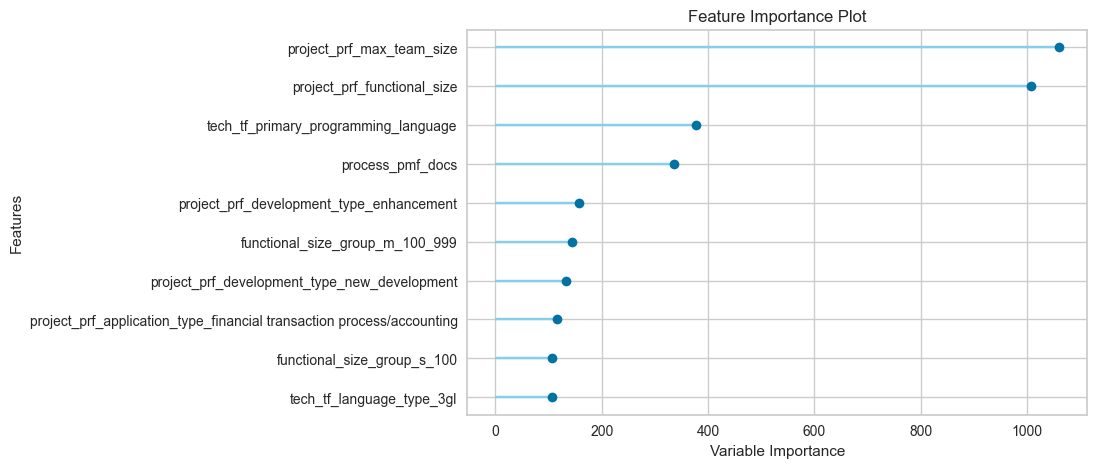

<Figure size 800x550 with 0 Axes>

  PyCaret feature importance plot saved to ../plots/synthetic_financial_feature_importance_model_1_LGBMRegressor.png

Model 2: GradientBoostingRegressor


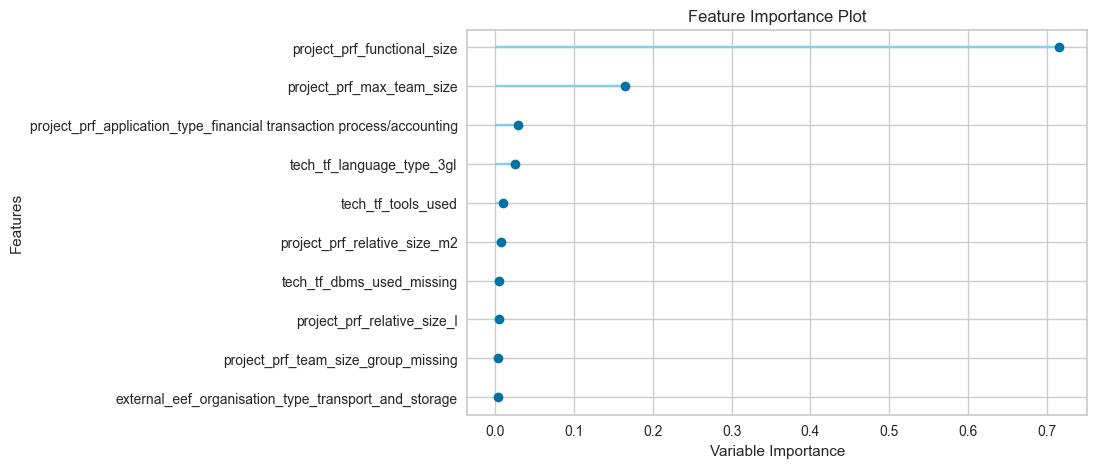

<Figure size 800x550 with 0 Axes>

  PyCaret feature importance plot saved to ../plots/synthetic_financial_feature_importance_model_2_GradientBoostingRegressor.png

Model 3: LassoLars


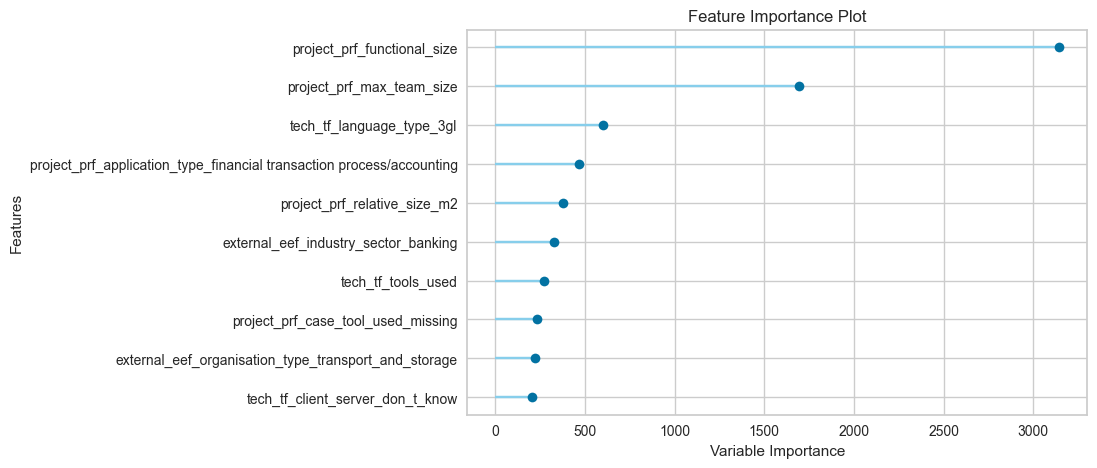

<Figure size 800x550 with 0 Axes>

  PyCaret feature importance plot saved to ../plots/synthetic_financial_feature_importance_model_3_LassoLars.png

  Generating permutation-based feature importance plot...
  Could not generate permutation feature plot: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- project_prf_application_type
Feature names seen at fit time, yet now missing:
- project_prf_application_type_auditing management
- project_prf_application_type_business application
- project_prf_application_type_cards and payments
- project_prf_application_type_customer billing/relationship management
- project_prf_application_type_electronic data interchange
- ...



<Figure size 1000x600 with 0 Axes>

Cell executed at: 2025-07-08 10:44:12.590173


In [36]:
# code modified for top 3 models

from pycaret.regression import plot_model
import os
import matplotlib.pyplot as plt

pycaret_X=X
pycaret_y = y

os.makedirs(plots_folder, exist_ok=True)
feature_names = pycaret_X.columns.tolist()  # Make sure to use the same data as in training
print(f"All features: {feature_names}")


for i, tuned_model in enumerate(tuned_models, 1):
    model_name = type(tuned_model).__name__
    print(f"\nModel {i}: {model_name}")

    # First try PyCaret's plot_model
    try:
        plot_model(tuned_model, plot='feature', save=False)
        plt.savefig(f'{plots_folder}/{file_name_no_ext}_feature_importance_model_{i}_{model_name}.png')
        plt.show()
        plt.close()
        print(f"  PyCaret feature importance plot saved to {plots_folder}/{file_name_no_ext}_feature_importance_model_{i}_{model_name}.png")
    except Exception as e:
        print(f"  PyCaret plot_model failed: {e}")
        # Fallback for linear models with coefficients
        try:
            # If it's a linear model (like HuberRegressor, LinearRegression, etc.)
            if hasattr(tuned_model, 'coef_'):
                importance_df = plot_linear_feature_importance(
                    tuned_model, pycaret_X, pycaret_y, 
                    feature_names=feature_names, 
                    method='coefficients'
                )
                print("  Custom coefficient-based feature importance plot saved.")
                print("  All important features:")
                print(importance_df)
            else:
                print("  This model does not support .coef_ or is not a linear model.")
        except Exception as e2:
            print(f"  Could not generate feature plot for linear model: {e2}")

    # Optionally: also plot permutation-based feature importance for all linear models
    if hasattr(tuned_model, 'coef_'):
        print("\n  Generating permutation-based feature importance plot...")
        try:
            importance_df_perm = plot_linear_feature_importance(
                tuned_model, pycaret_X, pycaret_y, 
                feature_names=feature_names, 
                method='permutation'
            )
            print("  Allimportant features (permutation):")
            print(importance_df_perm)
        except Exception as e:
            print(f"  Could not generate permutation feature plot: {e}")


[Back to top](#Index:)

<a id='part9'></a>

# Part 9 - SHAP Analysis

xxx


==================== MODEL 1 ====================
SHAP already installed
Plots will be saved to: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots
Starting SHAP Analysis...
Data shape: (10000, 94)
Using 100 samples for analysis
Model type: LGBMRegressor
Using TreeExplainer

SHAP PLOTS
Summary plot saved to: ../plots/shap_summary_LGBMRegressor.png


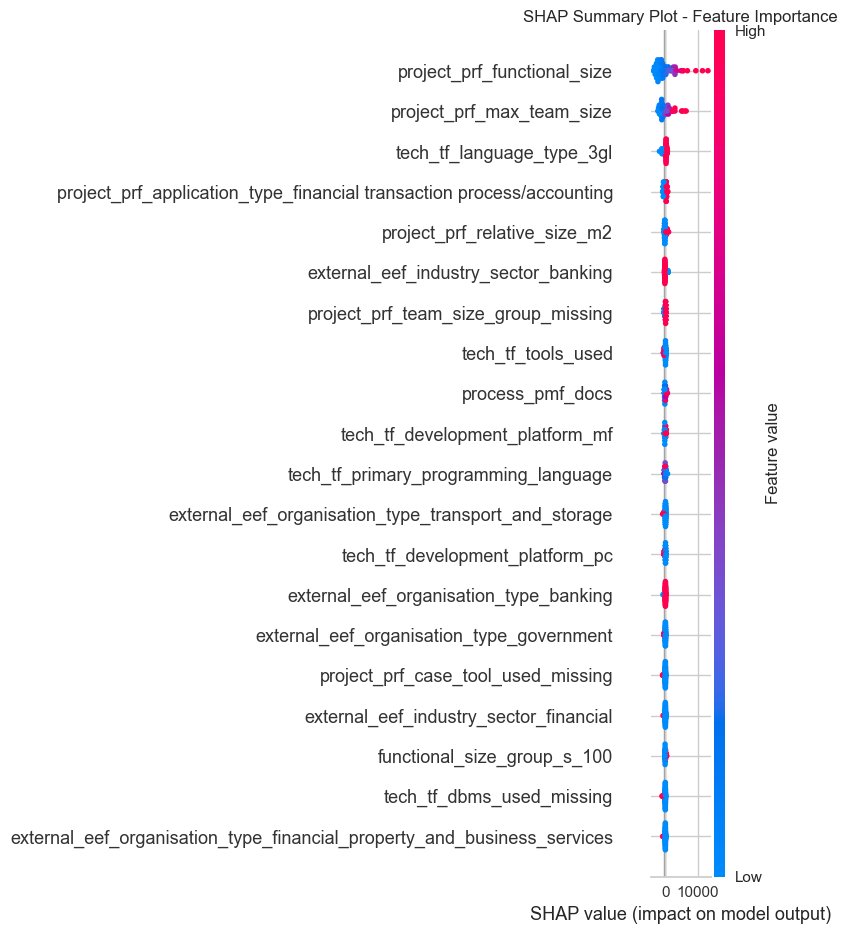

Summary plot created
Bar plot saved to: ../plots/synthetic_financial_shap_importance_bar_LGBMRegressor.png


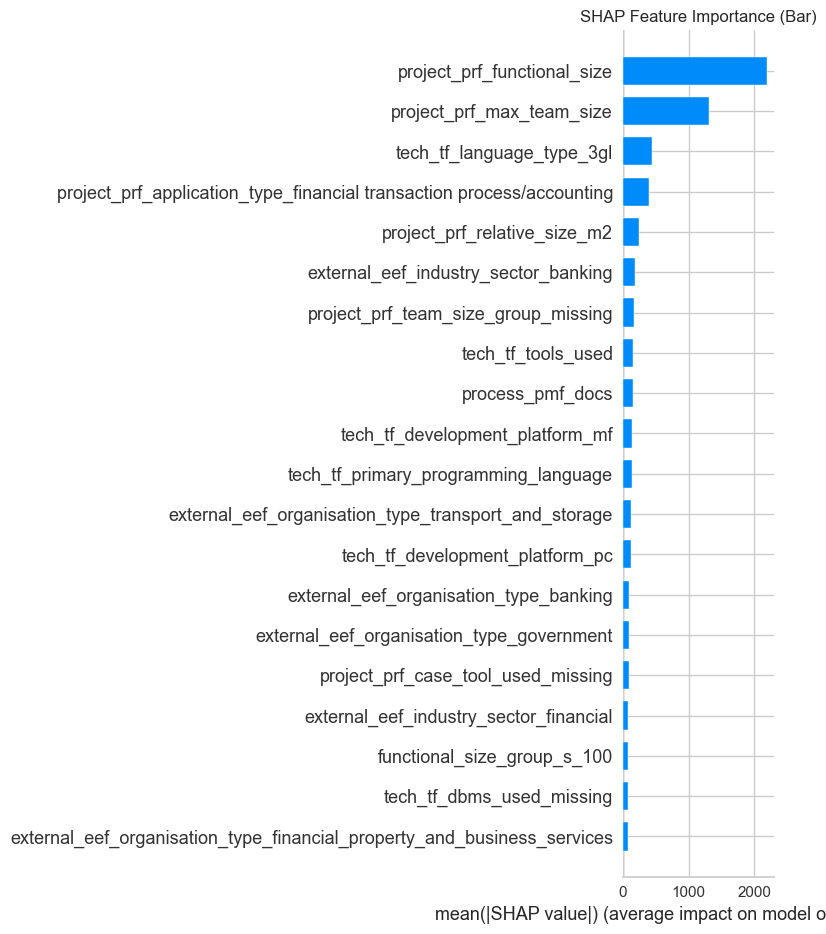

Bar plot created
Dependence plot saved to: ../plots/synthetic_financial_shap_dependence_project_prf_functional_size_LGBMRegressor.png


<Figure size 1000x600 with 0 Axes>

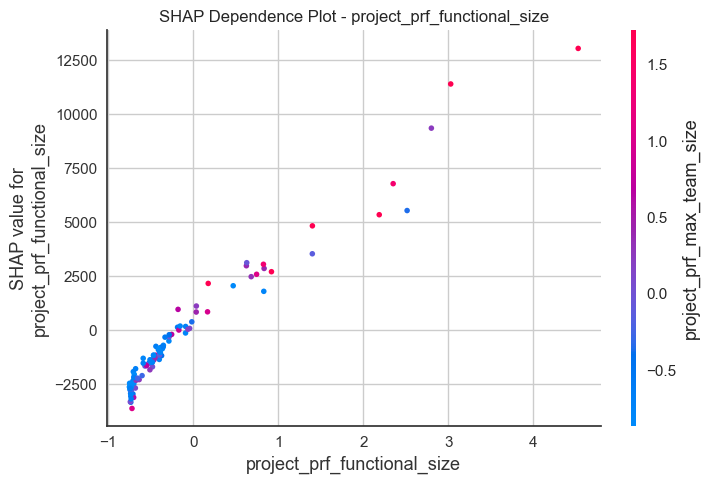

Dependence plot for 'project_prf_functional_size' created
Using modern waterfall plot...
Waterfall plot saved to: ../plots/synthetic_financial_shap_waterfall_LGBMRegressor.png


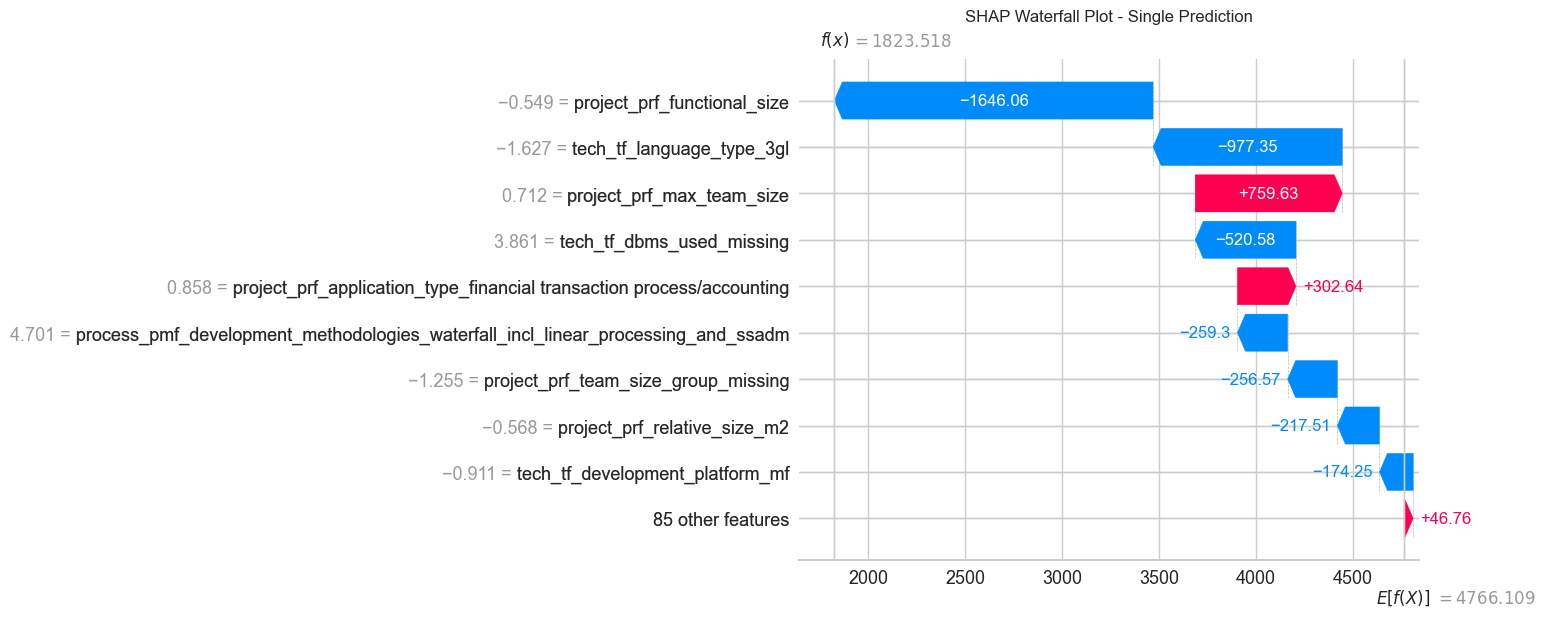

Waterfall plot created

All plots saved to folder: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots

SHAP Analysis Complete!

==================== MODEL 2 ====================
SHAP already installed
Plots will be saved to: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots
Starting SHAP Analysis...
Data shape: (10000, 94)
Using 100 samples for analysis
Model type: GradientBoostingRegressor
Using TreeExplainer

SHAP PLOTS
Summary plot saved to: ../plots/shap_summary_GradientBoostingRegressor.png


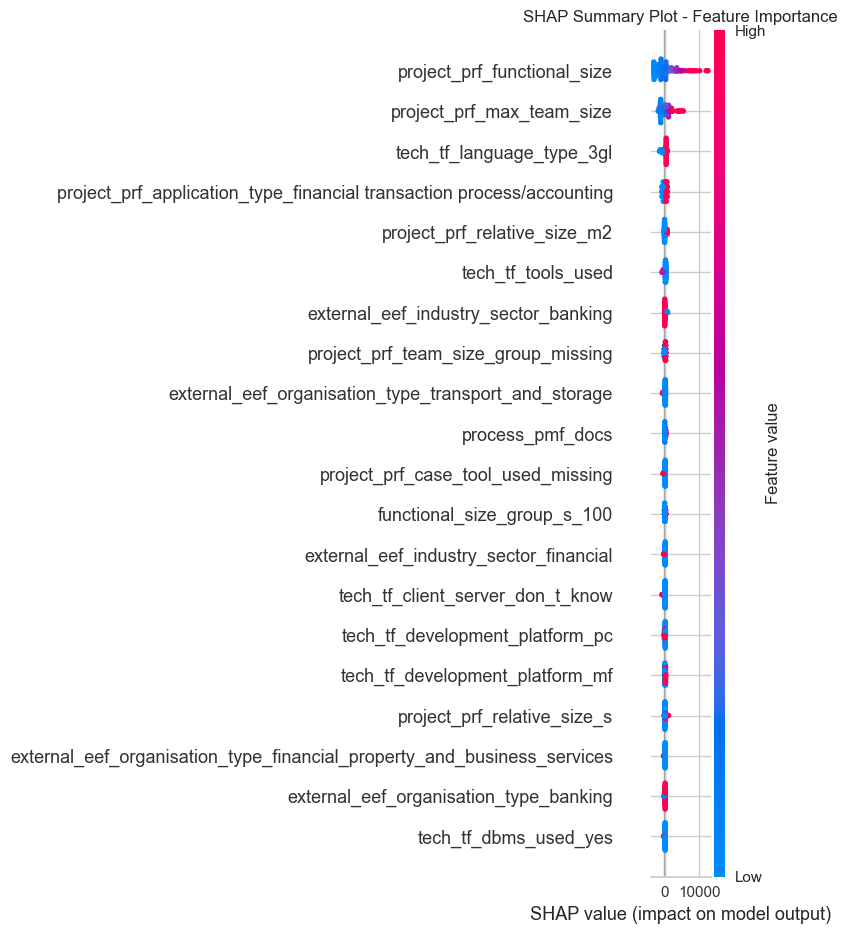

Summary plot created
Bar plot saved to: ../plots/synthetic_financial_shap_importance_bar_GradientBoostingRegressor.png


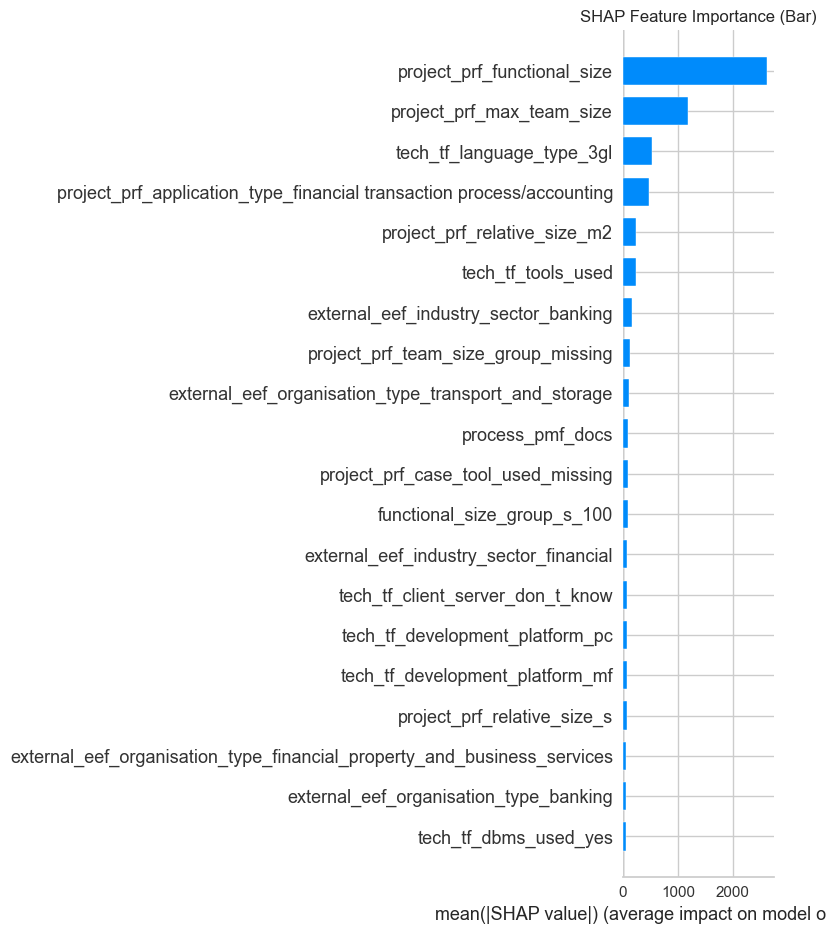

Bar plot created
Dependence plot saved to: ../plots/synthetic_financial_shap_dependence_project_prf_functional_size_GradientBoostingRegressor.png


<Figure size 1000x600 with 0 Axes>

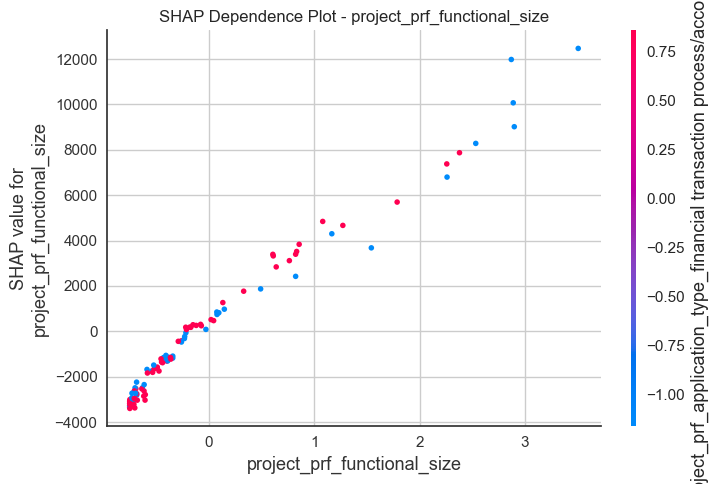

Dependence plot for 'project_prf_functional_size' created
Using modern waterfall plot...
Waterfall plot saved to: ../plots/synthetic_financial_shap_waterfall_GradientBoostingRegressor.png


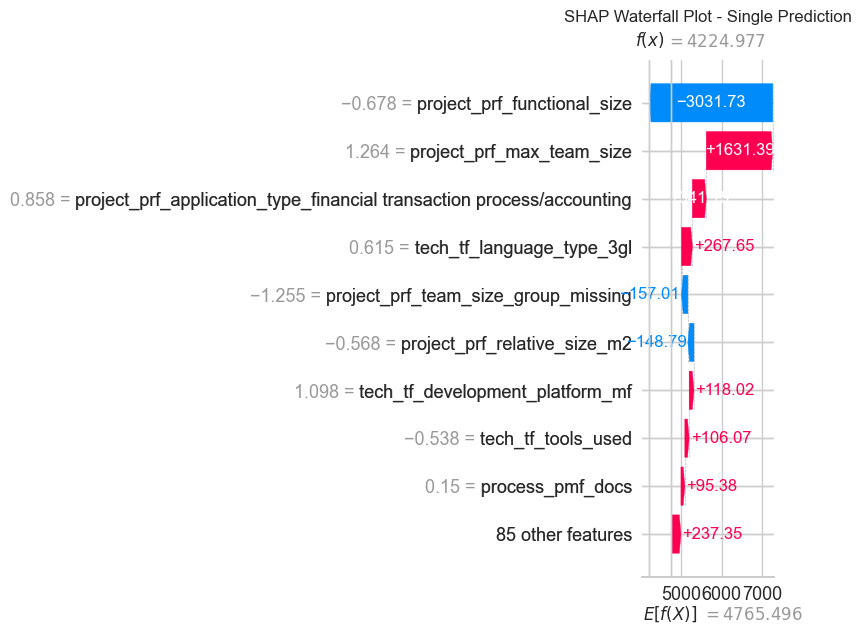

Waterfall plot created

All plots saved to folder: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots

SHAP Analysis Complete!

==================== MODEL 3 ====================
SHAP already installed
Plots will be saved to: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots
Starting SHAP Analysis...
Data shape: (10000, 94)
Using 100 samples for analysis
Model type: LassoLars
Using LinearExplainer

SHAP PLOTS
Summary plot saved to: ../plots/shap_summary_LassoLars.png


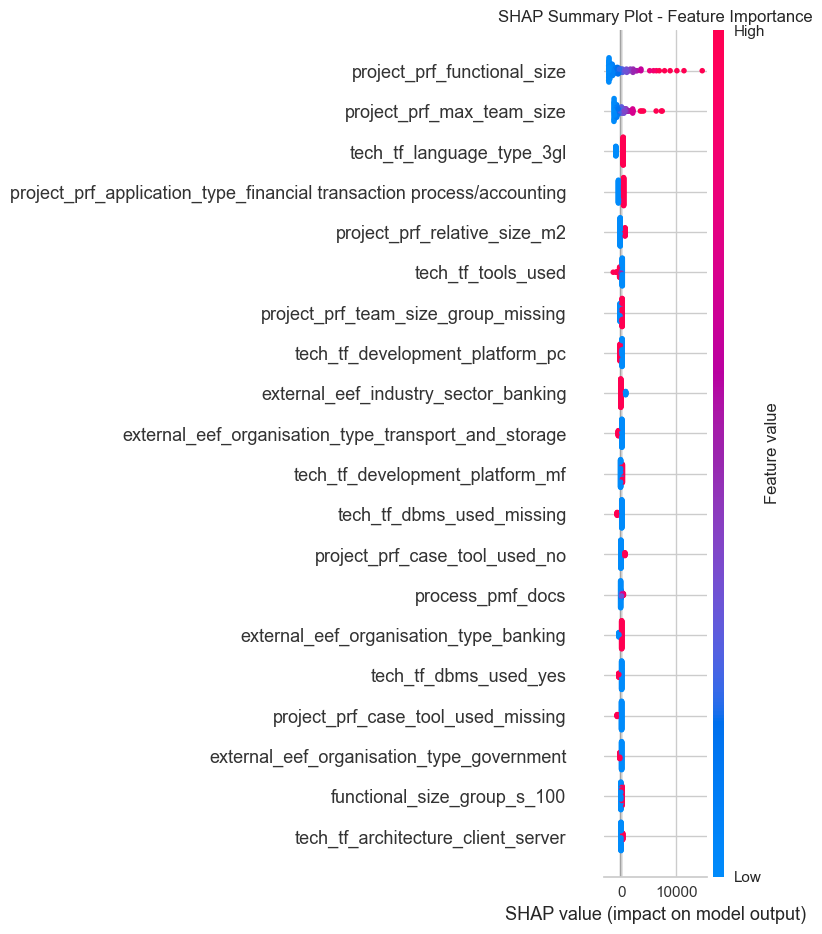

Summary plot created
Bar plot saved to: ../plots/synthetic_financial_shap_importance_bar_LassoLars.png


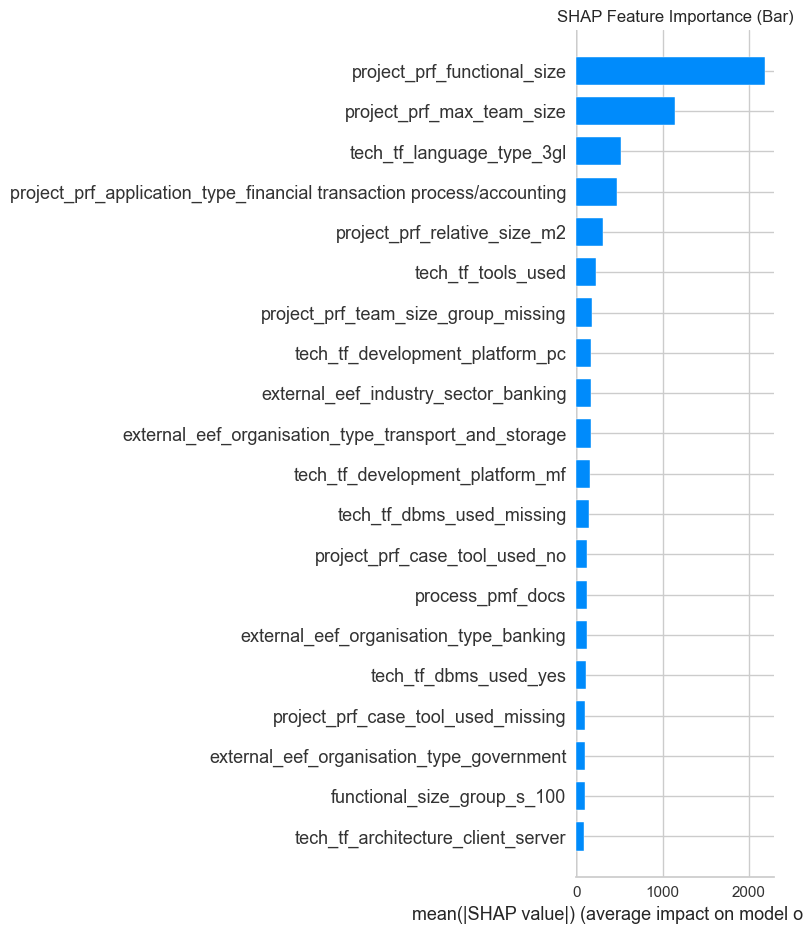

Bar plot created
Dependence plot saved to: ../plots/synthetic_financial_shap_dependence_project_prf_functional_size_LassoLars.png


<Figure size 1000x600 with 0 Axes>

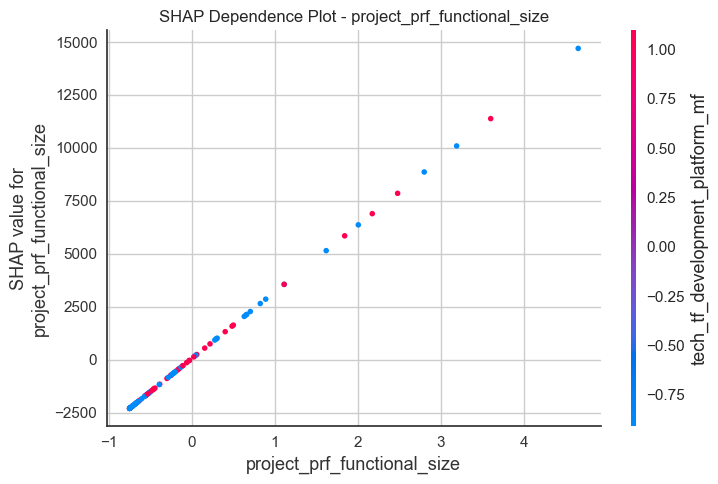

Dependence plot for 'project_prf_functional_size' created
Using modern waterfall plot...
Waterfall plot saved to: ../plots/synthetic_financial_shap_waterfall_LassoLars.png


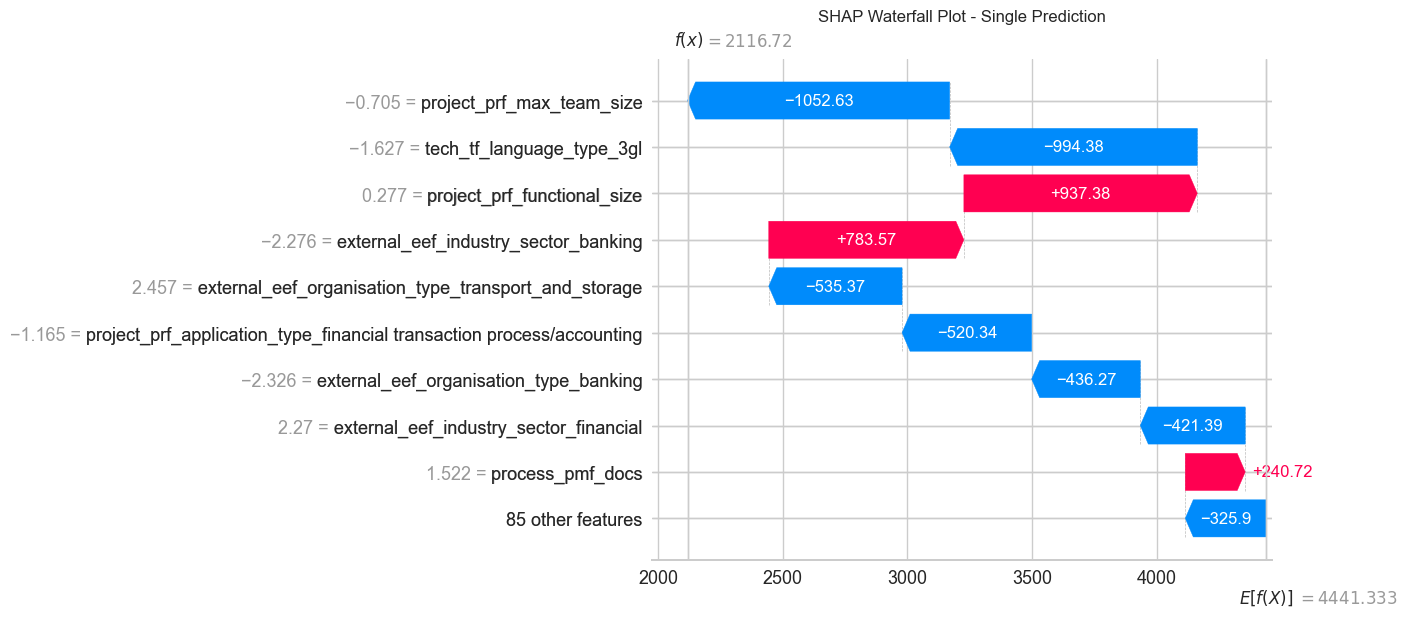

Waterfall plot created

All plots saved to folder: C:\Users\jdche\Documents\GitHub\early_agile_estimator\plots

SHAP Analysis Complete!
Cell executed at: 2025-07-08 10:44:26.743006


In [37]:
# SHAP analysis with proper data type handling and debugging
"""
Global Perspective:
- Summary Plot: Provides a global overview of feature importance and their 
  positive or negative impact on the model output across the entire dataset.
- Dependence Plot: Illustrates the relationship between a single feature's 
  value and its SHAP value across all instances to understand its general 
  effect on the prediction.
- Bar Chart: Shows the global importance of each feature based on the average 
  magnitude of their SHAP values across the entire dataset.

Single Instance Perspective:
- Force Plot: Explains the prediction for a single instance by showing how each 
  feature contributes to moving the prediction from the base value for that specific case.
- Waterfall Plot: Explains the prediction for a single instance by visualizing the sequential, 
  additive contribution of each feature's SHAP value for that specific prediction.
"""

def install_shap():
    """Install SHAP if not available"""
    try:
        import shap
        print("SHAP already installed")
        return True
    except ImportError:
        print("Installing SHAP...")
        import subprocess
        import sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "shap"])
        import shap
        print("SHAP installed successfully")
        return True

def shap_analysis(model, X_data, feature_names=None, sample_size=100, save_plots=True, plots_folder='plots'):
    """
    Simplified SHAP analysis with essential plots
    
    Parameters:
    - model: trained model
    - X_data: feature data (DataFrame or array)
    - feature_names: list of feature names (optional)
    - sample_size: number of samples for analysis (default: 100)
    - save_plots: whether to save plots to folder (default: True)
    - plots_folder: folder name to save plots (default: 'plots')
    """
    
    # Install SHAP if needed
    install_shap()
    import shap
    import os
    
    # Create plots folder if saving is enabled
    if save_plots:
        os.makedirs(plots_folder, exist_ok=True)
        print(f"Plots will be saved to: {os.path.abspath(plots_folder)}")
    
    print("Starting SHAP Analysis...")
    print(f"Data shape: {X_data.shape}")
    
    # Prepare data
    if hasattr(X_data, 'columns') and feature_names is None:
        feature_names = X_data.columns.tolist()
    elif feature_names is None:
        feature_names = [f"Feature_{i}" for i in range(X_data.shape[1])]
    
    # Sample data for efficiency
    if X_data.shape[0] > sample_size:
        sample_idx = np.random.choice(X_data.shape[0], sample_size, replace=False)
        X_sample = X_data.iloc[sample_idx] if hasattr(X_data, 'iloc') else X_data[sample_idx]
        print(f"Using {sample_size} samples for analysis")
    else:
        X_sample = X_data
    
    # Convert to float for SHAP
    try:
        X_sample = X_sample.astype(float)
    except:
        print("Could not convert to float, using original data")
    
    # Choose appropriate explainer
    model_type = str(type(model)).lower()
    print(f"Model type: {type(model).__name__}")
    
    # Track explainer type for waterfall plot handling
    explainer_type = None
    
    try:
        if any(x in model_type for x in ['tree', 'forest', 'xgboost', 'lgbm', 'catboost', 'gradient']):
            print("Using TreeExplainer")
            explainer = shap.TreeExplainer(model)
            shap_values = explainer(X_sample)
            explainer_type = 'tree'
        elif any(x in model_type for x in ['linear', 'logistic', 'ridge', 'lasso']):
            print("Using LinearExplainer")
            explainer = shap.LinearExplainer(model, X_sample)
            shap_values = explainer(X_sample)
            explainer_type = 'linear'
        else:
            print("Using Explainer (auto-detect)")
            explainer = shap.Explainer(model, X_sample)
            shap_values = explainer(X_sample)
            explainer_type = 'auto'
    except Exception as e:
        print(f"Auto-explainer failed, using KernelExplainer: {e}")
        explainer = shap.KernelExplainer(model.predict, X_sample[:10])  # Smaller background
        shap_values = explainer.shap_values(X_sample)
        explainer_type = 'kernel'
    
    # Extract SHAP values array
    shap_array = shap_values.values if hasattr(shap_values, 'values') else shap_values
    
    # Get model name for file naming
    model_name = type(model).__name__
    
    print("\n" + "="*50)
    print("SHAP PLOTS")
    print("="*50)
    
    # 1. Summary Plot (Global Feature Importance)
    try:
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_array, X_sample, feature_names=feature_names, show=False)
        plt.title("SHAP Summary Plot - Feature Importance")
        plt.tight_layout()
        if save_plots:
            summary_path = f'{plots_folder}/shap_summary_{model_name}.png'
            plt.savefig(summary_path, dpi=300, bbox_inches='tight')
            print(f"Summary plot saved to: {summary_path}")
        plt.show()
        print("Summary plot created")
    except Exception as e:
        print(f"Summary plot failed: {e}")
    
    # 2. Bar Plot (Feature Importance)
    try:
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_array, X_sample, feature_names=feature_names, 
                         plot_type="bar", show=False)
        plt.title("SHAP Feature Importance (Bar)")
        plt.tight_layout()
        if save_plots:
            bar_path = f'{plots_folder}/{file_name_no_ext}_shap_importance_bar_{model_name}.png'
            plt.savefig(bar_path, dpi=300, bbox_inches='tight')
            print(f"Bar plot saved to: {bar_path}")
        plt.show()
        print("Bar plot created")
    except Exception as e:
        print(f"Bar plot failed: {e}")
    
    # 3. Dependence Plot for top feature
    try:
        # Find most important feature
        mean_shap = np.abs(shap_array).mean(0)
        top_feature_idx = np.argmax(mean_shap)
        top_feature = feature_names[top_feature_idx]
        
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(top_feature_idx, shap_array, X_sample, 
                           feature_names=feature_names, show=False)
        plt.title(f"SHAP Dependence Plot - {top_feature}")
        plt.tight_layout()
        if save_plots:
            dep_path = f'{plots_folder}/{file_name_no_ext}_shap_dependence_{top_feature}_{model_name}.png'
            plt.savefig(dep_path, dpi=300, bbox_inches='tight')
            print(f"Dependence plot saved to: {dep_path}")
        plt.show()
        print(f"Dependence plot for '{top_feature}' created")
    except Exception as e:
        print(f"Dependence plot failed: {e}")
    
    # 4. Waterfall Plot for first instance - FIXED VERSION
    try:
        plt.figure(figsize=(10, 6))
        
        if explainer_type == 'kernel':
            # For KernelExplainer, create proper Explanation object
            print("Creating waterfall plot for KernelExplainer...")
            
            # Get the first instance data
            first_instance = X_sample.iloc[0] if hasattr(X_sample, 'iloc') else X_sample[0]
            first_shap = shap_array[0]
            
            # Create Explanation object manually
            explanation = shap.Explanation(
                values=first_shap,
                base_values=explainer.expected_value,
                data=first_instance,
                feature_names=feature_names
            )
            
            shap.plots.waterfall(explanation, show=False)
            
        elif hasattr(shap_values, '__getitem__') and hasattr(shap_values, 'base_values'):
            # For newer SHAP versions with Explanation objects
            print("Using modern waterfall plot...")
            shap.plots.waterfall(shap_values[0], show=False)
            
        else:
            # Fallback for older versions or different explainer types
            print("Using legacy waterfall plot...")
            base_val = getattr(explainer, 'expected_value', 0)
            if hasattr(base_val, '__getitem__'):
                base_val = base_val[0] if len(base_val) > 0 else 0
                
            first_instance = X_sample.iloc[0] if hasattr(X_sample, 'iloc') else X_sample[0]
            
            shap.waterfall_plot(
                base_val, 
                shap_array[0], 
                first_instance,
                feature_names=feature_names,
                show=False
            )
        
        plt.title("SHAP Waterfall Plot - Single Prediction")
        plt.tight_layout()
        if save_plots:
            waterfall_path = f'{plots_folder}/{file_name_no_ext}_shap_waterfall_{model_name}.png'
            plt.savefig(waterfall_path, dpi=300, bbox_inches='tight')
            print(f"Waterfall plot saved to: {waterfall_path}")
        plt.show()
        print("Waterfall plot created")
        
    except Exception as e:
        print(f"Waterfall plot failed: {e}")
        # Alternative: Force plot as backup
        try:
            print("Attempting force plot as alternative...")
            plt.figure(figsize=(12, 4))
            base_val = getattr(explainer, 'expected_value', 0)
            if hasattr(base_val, '__getitem__'):
                base_val = base_val[0] if len(base_val) > 0 else 0
            
            first_instance = X_sample.iloc[0] if hasattr(X_sample, 'iloc') else X_sample[0]
            shap.force_plot(base_val, shap_array[0], first_instance, 
                           feature_names=feature_names, matplotlib=True, show=False)
            plt.title("SHAP Force Plot - Single Prediction (Alternative)")
            if save_plots:
                force_path = f'{plots_folder}/{file_name_no_ext}_shap_force_{model_name}.png'
                plt.savefig(force_path, dpi=300, bbox_inches='tight')
                print(f"Force plot saved to: {force_path}")
            plt.show()
            print("Force plot created as alternative")
        except Exception as e2:
            print(f"Both waterfall and force plots failed: {e2}")
    
    if save_plots:
        print(f"\nAll plots saved to folder: {os.path.abspath(plots_folder)}")
    print("\nSHAP Analysis Complete!")
    return shap_values, explainer

# Quick function for single model analysis
def quick_shap(model, X_data, y_data=None, save_plots=True):
    """
    Ultra-simple SHAP analysis - just pass your model and data
    """
    print("Quick SHAP Analysis")
    return shap_analysis(model, X_data, save_plots=save_plots)


# -------- RUN SHAP FOR ALL TUNED MODELS --------

# For a single model (saves plots by default):
#shap_values, explainer = quick_shap(your_model, X_test)

# Without saving plots:
#shap_analysis(your_model, X_test, save_plots=False)

# Custom plots folder:
#shap_analysis(your_model, X_test, plots_folder='my_shap_plots')

# For multiple models:
#models = [model1, model2, model3]  # Your list of models
#for i, model in enumerate(models, 1):
#    print(f"\n{'='*20} MODEL {i} {'='*20}")
#    shap_analysis(model, X_test, sample_size=50, plots_folder=f'plots/model_{i}')

# With PyCaret:
from pycaret.regression import get_config
X_transformed = get_config('X_transformed')

for idx, tuned_model in enumerate(tuned_models, 1):
    print(f"\n{'='*20} MODEL {idx} {'='*20}")
    shap_analysis(tuned_model, X_transformed, plots_folder=plots_folder)


# Function to check what plots were saved
def check_saved_plots(plots_folder=plots_folder):
    """Check what SHAP plots were saved in the folder"""
    import os
    if os.path.exists(plots_folder):
        files = [f for f in os.listdir(plots_folder) if f.endswith('.png')]
        if files:
            print(f"Found {len(files)} SHAP plots in '{plots_folder}':")
            for file in sorted(files):
                print(f"  - {file}")
        else:
            print(f"No plot files found in '{plots_folder}'")
    else:
        print(f"Folder '{plots_folder}' does not exist")

In [38]:
# Extract feature importance directly (if available)
# Feature Importance Extraction - Refined Version
"""
Extract and analyze built-in feature importance from trained models.
This provides quick numerical insights into which features each model considers most important.

Supports:
- Tree-based models: feature_importances_ attribute
- Linear models: coef_ attribute (absolute values)
- Saves results as CSV files for further analysis
"""

def extract_feature_importance(tuned_models, data_folder='feature_analysis', top_n=15):
    """
    Extract built-in feature importance from models
    
    Parameters:
    - tuned_models: list of trained models
    - data_folder: folder to save CSV files (default: 'feature_analysis')
    - top_n: number of top features to display (default: 15)
    """
    
    print("="*60)
    print("FEATURE IMPORTANCE EXTRACTION")
    print("="*60)
    
    from pycaret.regression import get_config
    
    # Create output directory
    os.makedirs(data_folder, exist_ok=True)
    print(f"Feature importance files will be saved to: {os.path.abspath(data_folder)}")
    
    # Get feature names from transformed data
    try:
        feature_names = get_config('X_transformed').columns
        print(f"Total features available: {len(feature_names)}")
    except Exception as e:
        print(f"Could not get feature names from PyCaret config: {e}")
        return
    
    successful_extractions = 0
    
    for idx, tuned_model in enumerate(tuned_models, 1):
        model_name = type(tuned_model).__name__
        print(f"\n{'-'*40}")
        print(f"Model {idx}: {model_name}")
        print(f"{'-'*40}")
        
        try:
            # Determine importance extraction method
            if hasattr(tuned_model, 'feature_importances_'):
                importances = tuned_model.feature_importances_
                importance_label = 'feature_importances_'
                print(f"✓ Using {importance_label} attribute")
                
            elif hasattr(tuned_model, 'coef_'):
                # For linear models, use absolute coefficients
                coef = tuned_model.coef_
                # Handle multi-output case
                if coef.ndim > 1:
                    importances = np.abs(coef).mean(axis=0)
                else:
                    importances = np.abs(coef)
                importance_label = 'coef_ (absolute values)'
                print(f"✓ Using {importance_label}")
                
            else:
                print(f"✗ Feature importance attribute not available for {model_name}")
                print("  Supported attributes: feature_importances_, coef_")
                continue
            
            # Validate lengths match
            if len(feature_names) != len(importances):
                print(f"⚠ Warning: Length mismatch detected!")
                print(f"  Features: {len(feature_names)}, Importances: {len(importances)}")
                min_length = min(len(feature_names), len(importances))
                feature_names_adj = feature_names[:min_length]
                importances_adj = importances[:min_length]
                print(f"  Using first {min_length} elements for both")
            else:
                feature_names_adj = feature_names
                importances_adj = importances
                print(f"✓ Lengths match: {len(feature_names_adj)} features")
            
            # Create feature importance DataFrame
            fi_df = pd.DataFrame({
                'feature': feature_names_adj,
                'importance': importances_adj,
                'model': model_name,
                'importance_type': importance_label
            })
            
            # Sort by importance (descending)
            fi_df = fi_df.sort_values('importance', ascending=False).reset_index(drop=True)
            
            # Add rank
            fi_df['rank'] = range(1, len(fi_df) + 1)
            
            # Display top features
            print(f"\nTop {min(top_n, len(fi_df))} Most Important Features:")
            display_df = fi_df[['rank', 'feature', 'importance']].head(top_n)
            print(display_df.to_string(index=False, float_format='{:.6f}'.format))
            
            # Save to CSV
            output_filename = f"{file_name_no_ext}_feature_importance_model_{idx}_{model_name}.csv"
            output_path = os.path.join(data_folder, output_filename)
            fi_df.to_csv(output_path, index=False)
            
            print(f"✓ Feature importance saved to: '{output_path}'")
            print(f"  Rows saved: {len(fi_df)}")
            print(f"  Importance type: {importance_label}")
            
            successful_extractions += 1
            
        except Exception as e:
            print(f"✗ Failed to extract feature importance for {model_name}")
            print(f"  Error: {str(e)}")
            continue
    
    # Summary
    print(f"\n{'='*60}")
    print("EXTRACTION SUMMARY")
    print(f"{'='*60}")
    print(f"Total models processed: {len(tuned_models)}")
    print(f"Successful extractions: {successful_extractions}")
    print(f"Failed extractions: {len(tuned_models) - successful_extractions}")
    print(f"Output folder: {os.path.abspath(data_folder)}")
    
    return successful_extractions

def compare_feature_importance(data_folder='feature_analysis', top_n=10):
    """
    Compare feature importance across all saved models
    
    Parameters:
    - data_folder: folder containing feature importance CSV files
    - top_n: number of top features to compare
    """
    
    print(f"\n{'='*60}")
    print("FEATURE IMPORTANCE COMPARISON")
    print(f"{'='*60}")
    
    # Find all feature importance files
    if not os.path.exists(data_folder):
        print(f"Folder '{data_folder}' does not exist")
        return
    
    csv_files = [f for f in os.listdir(data_folder) if f.startswith('feature_importance_') and f.endswith('.csv')]
    
    if not csv_files:
        print(f"No feature importance files found in '{data_folder}'")
        return
    
    print(f"Found {len(csv_files)} feature importance files")
    
    # Load and combine all results
    all_importance = []
    
    for file in csv_files:
        file_path = os.path.join(data_folder, file)
        try:
            df = pd.read_csv(file_path)
            all_importance.append(df)
            print(f"✓ Loaded: {file}")
        except Exception as e:
            print(f"✗ Failed to load {file}: {e}")
    
    if not all_importance:
        print("No files could be loaded")
        return
    
    # Combine all DataFrames
    combined_df = pd.concat(all_importance, ignore_index=True)
    
    # Create pivot table for comparison
    pivot_df = combined_df.pivot_table(
        index='feature', 
        columns='model', 
        values='importance', 
        fill_value=0
    )
    
    # Calculate average importance across models
    pivot_df['avg_importance'] = pivot_df.mean(axis=1)
    pivot_df = pivot_df.sort_values('avg_importance', ascending=False)
    
    # Display top features comparison
    print(f"\nTop {top_n} Features - Comparison Across Models:")
    print("-" * 80)
    comparison_df = pivot_df.head(top_n)
    print(comparison_df.to_string(float_format='{:.6f}'.format))
    
    # Save comparison
    comparison_path = os.path.join(data_folder, '{file_name_no_ext}_feature_importance_comparison.csv')
    pivot_df.to_csv(comparison_path)
    print(f"\n✓ Comparison saved to: '{comparison_path}'")
    
    return pivot_df

def check_saved_importance(data_folder='feature_analysis'):
    """Check what feature importance files were saved"""
    
    print(f"\n{'='*60}")
    print("SAVED FEATURE IMPORTANCE FILES")
    print(f"{'='*60}")
    
    if not os.path.exists(data_folder):
        print(f"Folder '{data_folder}' does not exist")
        return
    
    csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]
    
    if csv_files:
        print(f"Found {len(csv_files)} CSV files in '{data_folder}':")
        for i, file in enumerate(sorted(csv_files), 1):
            file_path = os.path.join(data_folder, file)
            try:
                df = pd.read_csv(file_path)
                print(f"  {i}. {file} ({len(df)} features)")
            except:
                print(f"  {i}. {file} (could not read)")
    else:
        print(f"No CSV files found in '{data_folder}'")

# -------- USAGE EXAMPLES --------

# Basic usage with your tuned models:
# extract_feature_importance(tuned_models)

# Custom settings:
# extract_feature_importance(tuned_models, data_folder='my_analysis', top_n=20)

# Compare results across models:
# compare_feature_importance()

# Check what files were saved:
# check_saved_importance()

# -------- MAIN EXECUTION --------
# Uncomment to run with your models:


# Run feature importance extraction
successful = extract_feature_importance(tuned_models, data_folder=data_folder, top_n=15)

if successful > 0:
    # Compare importance across models
    comparison_df = compare_feature_importance(data_folder=data_folder, top_n=10)
    
    # Show saved files
    check_saved_importance(data_folder=data_folder)
else:
    print("No feature importance could be extracted from any model")


FEATURE IMPORTANCE EXTRACTION
Feature importance files will be saved to: C:\Users\jdche\Documents\GitHub\early_agile_estimator\data
Total features available: 94

----------------------------------------
Model 1: LGBMRegressor
----------------------------------------
✓ Using feature_importances_ attribute
✓ Lengths match: 94 features

Top 15 Most Important Features:
 rank                                                               feature  importance
    1                                             project_prf_max_team_size        1060
    2                                           project_prf_functional_size        1008
    3                                  tech_tf_primary_programming_language         377
    4                                                      process_pmf_docs         335
    5                              project_prf_development_type_enhancement         158
    6                                       functional_size_group_m_100_999         144
    7           

In [39]:
#verifying whether the trained model consider target column as input features

print(f"TARGET_COL value: {TARGET_COL}")


csv_features = pd.read_csv(f"{data_folder}/pycaret_processed_features_before_model_training.csv")
print("Features in CSV file:")
print(csv_features.columns.tolist())
print(f"\nDoes CSV contain target column? {'project_prf_normalised_work_effort' in csv_features.columns}")


for i, tuned_model in enumerate(tuned_models, 1):
    model_name = type(tuned_model).__name__
    print(f"\nModel {i}: {model_name}")
    
    # For PyCaret models, try different ways to get feature names
    if hasattr(tuned_model, 'feature_names_in_'):
        features = tuned_model.feature_names_in_
    elif hasattr(tuned_model, 'feature_names_'):
        features = tuned_model.feature_names_
    else:
        # Try to get from the pipeline
        try:
            features = tuned_model[:-1].get_feature_names_out()
        except:
            features = "Could not determine features"
    
    print(f"\n{model_name} expected features:")
    print(features)
    print(f"\nDoes CSV contain target column? {'project_prf_normalised_work_effort' in features}")

TARGET_COL value: project_prf_normalised_work_effort
Features in CSV file:
['project_prf_year_of_project', 'project_prf_application_type', 'tech_tf_primary_programming_language', 'project_prf_functional_size', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_tools_used', 'external_eef_organisation_type_banking_insurance_stock', 'external_eef_organisation_type_banking', 'external_eef_organisation_type_communications', 'external_eef_organisation_type_education_institution', 'external_eef_organisation_type_financial_banking_insurance_stock', 'external_eef_organisation_type_financial_property_and_business_services', 'external_eef_organisation_type_government', 'external_eef_organisation_type_medical_and_health_care', 'external_eef_organisation_type_transport_and_storage', 'external_eef_organisation_type_wholesale_and_retail_trade', 'external_eef_industry_sector_banking', 'external_eef_industry_sector_financial', 'project_prf_application_group_business_application', 'project_prf_ap